In [1]:
import nimfa 
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.colors import ListedColormap
from collections import Counter
import dill
import plotly
import plotly.express as px
from matplotlib.lines import Line2D
from datetime import date
from datetime import datetime
import os

In [2]:
# dill.load_session('Protein_517_Clustering_py_final_env.db')

# dill.load_session('Results_517_proteins_##date##/1_Protein_517_Clustering_py_final_env_##date##.db)

In [3]:
day = date.today().strftime("%d-%m-%Y")

results_dir = 'Results_517_proteins_' + str(day)

files_dirs = os.listdir()

flag = False
for file in files_dirs:
    if results_dir in file:
        file_name = file.split('(')
        flag = True
        if len(file_name) != 1:
            number = file_name[1][:-1]
            new_number = str(int(number) + 1)
        else:
            new_number = '1'

if flag == True:
    results_dir = results_dir + '(' + str(new_number) + ')'

os.mkdir(results_dir)

## **Importing the dataset**

In [4]:
# Importing the Amyloid beta positive Dataset
ab_pos_df = pd.read_excel('Lisbon_and_Coimbra_517_Proteomics.xlsx', sheet_name='517_Positive', index_col=0)

# Storing the Uniprot code of the proteins
uniprot_code = list(ab_pos_df.loc['Uniprot_code', :])
# Dropping the Uniprot code row
ab_pos_df = ab_pos_df.drop(['Uniprot_code'], axis=0)

# Storing the patients code
patient_code = list(ab_pos_df.index)

# Storing the proteins code
protein_code = list(ab_pos_df.columns)

# Transposing the dataframe
ab_pos_df = ab_pos_df.T

# Generating the V numpy matrix
V = ab_pos_df.values

In [5]:
print(f'The A-beta positive dataframe has dimension: \n {V.shape[0]} rows (proteins) x {V.shape[1]} columns (patients)')

ab_pos_df

The A-beta positive dataframe has dimension: 
 517 rows (proteins) x 68 columns (patients)


Sample code    LIS008    LIS011    LIS001    LIS031    LIS029    LIS005  \
ALBU_HUMAN   0.473614  0.416244   0.50116  0.325952  0.487779  0.488516   
TRFE_HUMAN   0.032312  0.066185  0.061336  0.042082  0.053792  0.062874   
TTHY_HUMAN   0.020003   0.02132  0.015891  0.018826  0.015953  0.016099   
PTGDS_HUMAN  0.017687  0.031627  0.032295  0.032637  0.024905  0.021385   
FBLN1_HUMAN  0.003471  0.003187  0.003391  0.003686  0.002509   0.00272   
...               ...       ...       ...       ...       ...       ...   
DSG2_HUMAN   0.000026  0.000018  0.000017  0.000048  0.000024  0.000054   
CO6A2_HUMAN  0.000022  0.000032  0.000016  0.000032   0.00003  0.000007   
LV223_HUMAN  0.000008  0.000045  0.000058  0.000058  0.000009  0.000013   
MOES_HUMAN   0.000002       0.0  0.000001  0.000003       0.0  0.000001   
CSPG4_HUMAN  0.000004  0.000001  0.000003  0.000004  0.000001  0.000001   

Sample code    LIS012    LIS018    LIS035    LIS033  ...    100111    104726  \
ALBU_HUMAN   0.475169  0.473022   0.43561  0.413888  ...  0.446176  0.527898   
TRFE_HUMAN   0.054684  0.035085   0.07155  0.072317  ...  0.024282  0.027016   
TTHY_HUMAN   0.013927  0.009555  0.012511  0.013033  ...  0.007869  0.011235   
PTGDS_HUMAN    0.0196  0.016239  0.027055  0.028736  ...  0.020868  0.016841   
FBLN1_HUMAN  0.002693  0.001849  0.003105  0.003634  ...  0.002167  0.002213   
...               ...       ...       ...       ...  ...       ...       ...   
DSG2_HUMAN   0.000029  0.000033  0.000007   0.00002  ...  0.000025  0.000077   
CO6A2_HUMAN  0.000011  0.000031  0.000024  0.000017  ...  0.000045  0.000033   
LV223_HUMAN  0.000039  0.000019   0.00001  0.000006  ...  0.000042  0.000026   
MOES_HUMAN   0.000012  0.000055  0.000001   0.00002  ...  0.000011  0.000001   
CSPG4_HUMAN  0.000002  0.000007  0.000006  0.000001  ...  0.000004  0.000002   

Sample code    105438    105080    109901    109089    103176    102357  \
ALBU_HUMAN   0.483252  0.514417  0.561115  0.582099  0.405769  0.396349   
TRFE_HUMAN    0.02694  0.036884  0.022925  0.034406  0.021734  0.019385   
TTHY_HUMAN   0.010793  0.010275  0.009932  0.009165  0.006709  0.008458   
PTGDS_HUMAN  0.019353  0.015642  0.015124   0.01506  0.014386  0.019213   
FBLN1_HUMAN   0.00199  0.001034  0.001021   0.00144  0.000929  0.001399   
...               ...       ...       ...       ...       ...       ...   
DSG2_HUMAN   0.000022  0.000039  0.000029  0.000024  0.000018  0.000066   
CO6A2_HUMAN  0.000059  0.000022  0.000014  0.000022  0.000008  0.000147   
LV223_HUMAN  0.000014  0.000023  0.000054  0.000028  0.000016  0.000027   
MOES_HUMAN   0.000022  0.000015  0.000005   0.00001   0.00002  0.000007   
CSPG4_HUMAN  0.000004  0.000008  0.000008  0.000007  0.000002  0.000003   

Sample code    107362    109522  
ALBU_HUMAN   0.343654  0.512686  
TRFE_HUMAN   0.022957   0.04786  
TTHY_HUMAN   0.013165  0.013442  
PTGDS_HUMAN   0.02549  0.014515  
FBLN1_HUMAN  0.001583  0.002719  
...               ...       ...  
DSG2_HUMAN   0.000036   0.00003  
CO6A2_HUMAN  0.000027  0.000063  
LV223_HUMAN  0.000019  0.000093  
MOES_HUMAN   0.000017  0.000009  
CSPG4_HUMAN  0.000002  0.000002  

[517 rows x 68 columns]

### **Defining the number of runs and iterations**

In [6]:
n_run = 50
max_iter = 150 

### **Defining results storing variables**

In [7]:
cophonetic_results = {}
silhouette_results = {}

## **Rank = 2**

In [8]:
# Building the model with rank = 2
nsnmf_2 = nimfa.Nsnmf(V, rank=2, n_run=n_run, max_iter=max_iter, track_factor=True)
nsnmf_2_fit = nsnmf_2()

In [9]:
# Computing the cophenetic correlation coefficient
cophonetic_cor_coef_2 = nsnmf_2_fit.fit.coph_cor()
print('Cophenetic correlation coefficient:', cophonetic_cor_coef_2)

cophonetic_results['Rank_2'] = cophonetic_cor_coef_2

Cophenetic correlation coefficient: 0.9907687225726581


### **Consensus matrix**

<ipython-input-10-dfc7afe86541>:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(C_2, method='average')


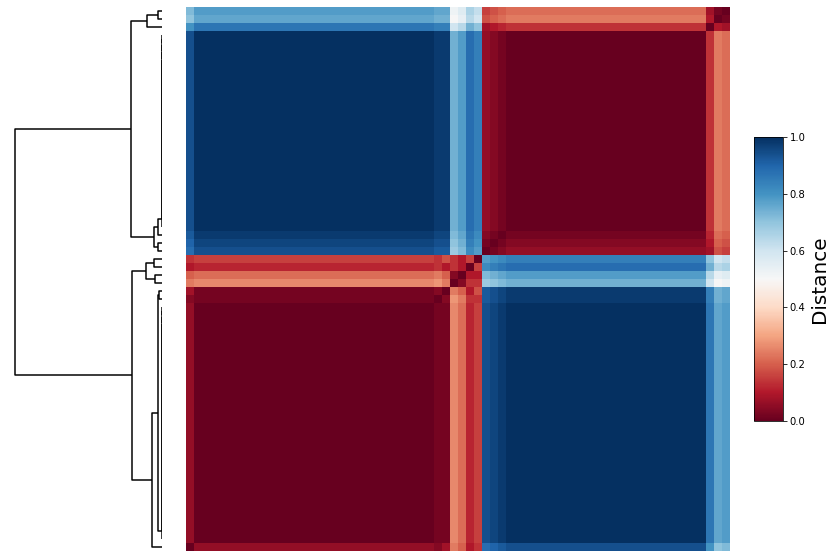

In [10]:
# plotting the Consensus matrix as an heatmap
def clean_axis(ax):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

fig = plt.figure(figsize=(13.9, 10))
heatmapGS = gridspec.GridSpec(1, 2, wspace=.01, hspace=0., width_ratios=[0.25, 1])

C_2 = 1 - nsnmf_2_fit.fit.consensus()
Y = sch.linkage(C_2, method='average') 

denAX = fig.add_subplot(heatmapGS[0, 0])
denD = sch.dendrogram(Y, orientation='left', link_color_func=lambda k: 'black')
clean_axis(denAX)

heatmapAX = fig.add_subplot(heatmapGS[0, 1])
D = C_2[denD['leaves'], :][:, denD['leaves']]
axi = heatmapAX.imshow(D, interpolation='nearest', aspect='equal', origin='lower', cmap='RdBu')
clean_axis(heatmapAX)

cb = fig.colorbar(axi, fraction=0.046, pad=0.04, aspect=10)
cb.set_label('Distance', fontsize=20)

# Saving the plot
plt.savefig(results_dir + '/Rank_2_Consensus_matrix.png')

### **W matrix**

In [11]:
# Computing the W basis matrix
W_2 = np.array(nsnmf_2_fit.fit.basis())

print(f'The shape of the W matrix is: {W_2.shape[0]} rows (proteins) x {W_2.shape[1]} columns (metaproteins)')

The shape of the W matrix is: 517 rows (proteins) x 2 columns (metaproteins)


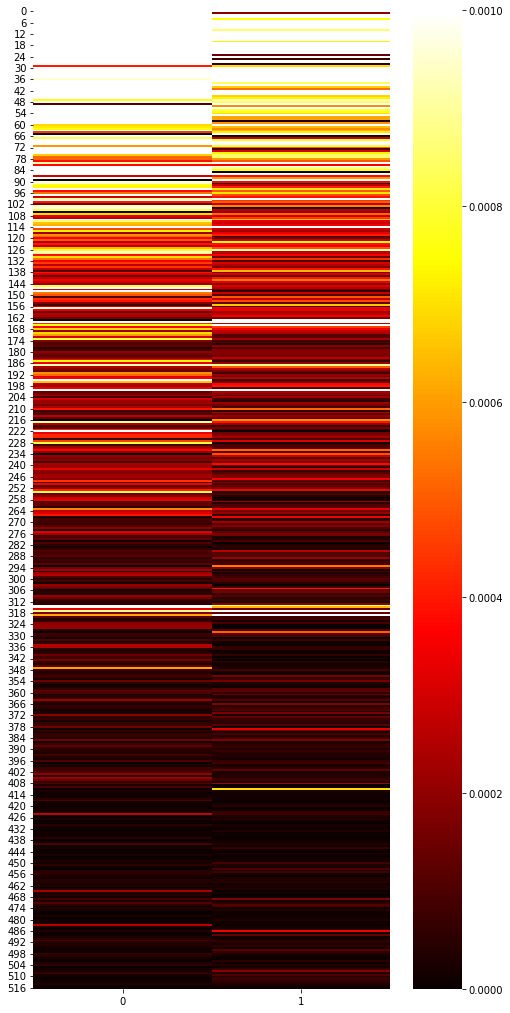

In [12]:
fig, ax = plt.subplots(figsize=(8, 18))

# Plotting the heatmap of the W matrix
sns.heatmap(W_2[: , : ], cmap='hot', vmax=0.001) #Try without setting vmax

# Saving the plot
plt.savefig(results_dir + '/Rank_2_W_matrix.png')

#### Visualizing for each cluster (metaprotein) the coefficient of the proteins

In [13]:
def k_proteins_of_metaprotein(W, cluster, k_protein=10, protein_code=protein_code):
    
    # converting in np.array
    W = np.array(W)
    # Dict with results
    protein_dict = {}

    for mtp in range(cluster):
        # sorting the proteins for their coefficient in the metaprotein
        topk = np.argsort(np.array(W[:, mtp]).flatten())[-k_protein:] #[::-1]
        # extracting the values corresponding to the topk sorted features
        val = W[topk, mtp]

        # retrieving the protein code for the topk proteins
        topk_labels = [protein_code[idx] for idx in topk]

        # storing the protien code and its coefficient in a dictionary
        protein_dict[mtp] = (val, topk_labels)

    return protein_dict

In [14]:
def plotting_metaproteins(protein_dict, k_protein=10):
    fig, ax = plt.subplots(len(protein_dict), 1, figsize=(7, 12))
    for clt, v in protein_dict.items():
        weight = v[0]
        labels = v[1]
        ax[clt].barh(np.arange(k_protein) + .5, weight, align='center')
        ax[clt].set_yticks(np.arange(k_protein) + .5)
        ax[clt].set_yticklabels(labels)
        ax[clt].set_xlabel('Weight')
        ax[clt].set_ylabel('Proteins')
        ax[clt].set_title("Cluster (Metaprotein): "+ str(clt), fontsize=15)

    fig.tight_layout()
    plt.show()

In [15]:
# extracting the topk proteins from each cluster (metaprotein)
prot_clusters_dict_2 = k_proteins_of_metaprotein(W_2, 2)

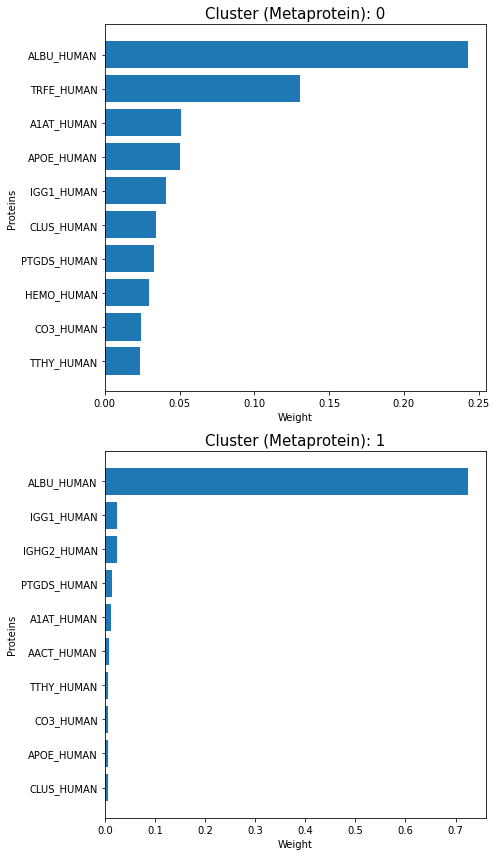

In [16]:
# plotting the topk proteins from each cluster
plotting_metaproteins(prot_clusters_dict_2)

In [17]:
# # print(prot_clusters_dict_2.values())
# for key in prot_clusters_dict_2.keys():
#     print('Cluster', key)
#     for prot in prot_clusters_dict_2[key][1]:
#         print(prot, end = ', ')
#     print()

### **H matrix**

In [18]:
# Computing the H coef matrix
H_2 = np.array(nsnmf_2_fit.fit.coef())

print(f'The shape of the H matrix is: {H_2.shape[0]} rows (metaprotein) x {H_2.shape[1]} columns (patients)')

The shape of the H matrix is: 2 rows (metaprotein) x 68 columns (patients)


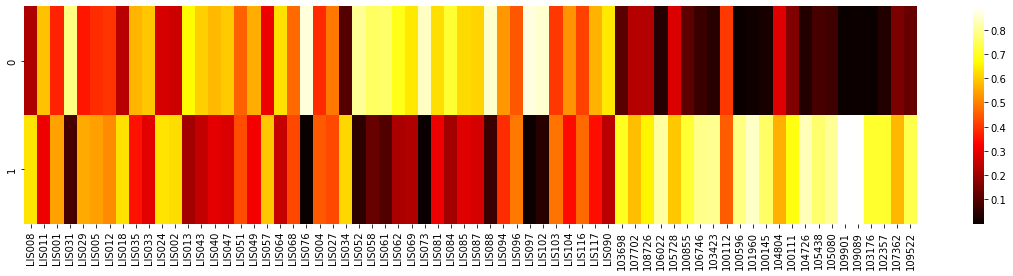

In [19]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.heatmap(H_2[: , : ], cmap='hot', xticklabels=patient_code) 

# Saving the plot
plt.savefig(results_dir + '/Rank_2_H_matrix.png')

In [20]:
def cluster_assign_patients(H):

    H = np.array(H)
    patient_metaprotein_dict = {}
    test = {}

    for idx in range(len(H_2[0])):
        coef = H[: , idx]
        patient_cls = np.argmax(coef)
        patient_metaprotein_dict[patient_code[idx]] = patient_cls
        test[patient_code[idx]] = list(coef)

    return patient_metaprotein_dict

In [21]:
patient_clusters_2 = cluster_assign_patients(H_2)

In [22]:
# divinding the patients in their clusters (metaprotein)
def grouping_patients_for_cluster(patient_clusters):

    clustered_patient = {}

    for patient, cluster in patient_clusters.items():
        if cluster in clustered_patient.keys():
            clustered_patient[cluster].append(patient)
        else:
            clustered_patient[cluster] = [patient]

    clustered_patient = dict(sorted(clustered_patient.items(), key=lambda x: int(x[0])))

    # print(patient_clusters)
    for cluster, patient in clustered_patient.items():
        print(f'Cluster(Metaprotein)_{cluster}: {patient} - N° of patients: {len(patient)} \n')

    

    return clustered_patient

In [23]:
clustered_patient_2 = grouping_patients_for_cluster(patient_clusters_2)

Cluster(Metaprotein)_0: ['LIS011', 'LIS031', 'LIS035', 'LIS033', 'LIS013', 'LIS043', 'LIS040', 'LIS047', 'LIS051', 'LIS049', 'LIS064', 'LIS068', 'LIS076', 'LIS027', 'LIS052', 'LIS058', 'LIS061', 'LIS062', 'LIS069', 'LIS073', 'LIS081', 'LIS084', 'LIS085', 'LIS087', 'LIS088', 'LIS094', 'LIS097', 'LIS102', 'LIS104', 'LIS117', 'LIS090'] - N° of patients: 31 

Cluster(Metaprotein)_1: ['LIS008', 'LIS001', 'LIS029', 'LIS005', 'LIS012', 'LIS018', 'LIS024', 'LIS002', 'LIS057', 'LIS004', 'LIS034', 'LIS096', 'LIS103', 'LIS116', '103698', '107702', '108726', '106022', '105728', '100855', '106746', '103423', '100112', '100596', '101960', '100145', '104804', '100111', '104726', '105438', '105080', '109901', '109089', '103176', '102357', '107362', '109522'] - N° of patients: 37 



In [24]:
# Saving the clustered patients
f = open(results_dir + '/Rank_2_Clustered_patients.txt', 'w')

for cluster, patient in clustered_patient_2.items():
    lis_tot = 0 
    coi_tot = 0
    for pat in patient:
        if pat[0] == 'L':
            lis_tot += 1
        else:
            coi_tot += 1
    f.write(f'Cluster(Metaprotein)_{cluster}: \n{patient} \nNumber of patients: {len(patient)} \n- {lis_tot} Lisbon patients \n- {coi_tot} Coimbra patients\n')
    f.write('\n')

f.close()

In [25]:
# for cluster, patients in clustered_patient_2.items():
#     print()
#     print(cluster)
#     print()
#     for pat in list(patients):
#         print(pat, end=', ')

In [26]:
# Function that will plot the clusters
def plotting_clusters(H, patient_clusters):

    fig, ax = plt.subplots(figsize=(8, 8))

    classes = ['Cluster_' + str(i) for i in range(len(H))]
    scatter = ax.scatter(H[0], H[1], c=list(patient_clusters.values()), s=100)
    ax.legend(handles=scatter.legend_elements()[0], labels=classes, fontsize=13, markerscale=1.5)

    for idx, label in enumerate(patient_code):
        ax.annotate(label, (H[0][idx], H[1][idx]), fontsize=8)

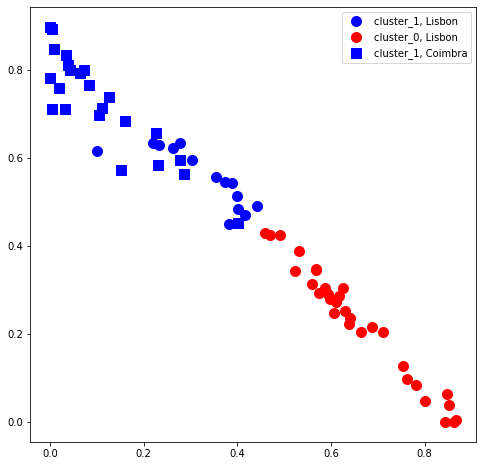

In [27]:
# Plotting the rank_2 patient clusters
x = H_2[0]
y = H_2[1]

fig, ax = plt.subplots(figsize=(8, 8))

labels = ['cluster_0', 'cluster_1']
color = ['red', 'blue']

label_0_lis_added = False
label_1_lis_added = False
label_0_coi_added = False
label_1_coi_added = False

for i in range(len(x)):
    if patient_clusters_2[patient_code[i]] == 0:
        col = color[0]
        lab = labels[0]
        if patient_code[i][0] == 'L':
            marker = 'o'
            if not label_0_lis_added:
                ax.scatter(x[i], y[i], s=100, c=col, marker=marker, label=lab + ', Lisbon')
                label_0_lis_added = True
            else:
                ax.scatter(x[i], y[i], s=100, c=col, marker=marker)
        if patient_code[i][0] != 'L':
            marker = 's'
            if not label_0_coi_added:
                ax.scatter(x[i], y[i], s=100, c=col, marker=marker, label=lab + ', Coimbra')
                label_0_coi_added = True
            else:
                ax.scatter(x[i], y[i], s=100, c=col, marker=marker)
    elif patient_clusters_2[patient_code[i]] == 1:
        col = color[1]
        lab = labels[1]
        if patient_code[i][0] == 'L':
            marker = 'o'
            if not label_1_lis_added:
                ax.scatter(x[i], y[i], s=100, c=col, marker=marker, label=lab + ', Lisbon')
                label_1_lis_added = True
            else:
                ax.scatter(x[i], y[i], s=100, c=col, marker=marker)
        if patient_code[i][0] != 'L':
            marker = 's'
            if not label_1_coi_added:
                ax.scatter(x[i], y[i], s=100, c=col, marker=marker, label=lab + ', Coimbra')
                label_1_coi_added = True
            else:
                ax.scatter(x[i], y[i], s=100, c=col, marker=marker)
ax.legend()

# Saving the plot
plt.savefig(results_dir + ('/Rank_2_Clustered_patients.png'))

### **Computing the Silhouette Score**

In [28]:
silhouette_score_2 = silhouette_score(C_2, list(patient_clusters_2.values()))
print(silhouette_score_2)

silhouette_results['Rank_2'] = silhouette_score_2

0.9505455199112629


In [29]:
def silhouette_plot(V, patient_clusters):

    silhouette_avg = silhouette_score(V.T, list(patient_clusters.values()))
    print('Silhouette average score:', silhouette_avg)
    
    # compute the silhouette score for each sample
    sample_silhouette_values = silhouette_samples(V.T, list(patient_clusters.values()))
    
    # extracting the cluster label from the patients
    cluster_labels = list(patient_clusters.values())
    
    # counting how many clusters
    n_cluster = len(Counter(list(patient_clusters.values())).keys())

    # creating a subplot
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # ax.set_ylim([0, len(V.T) + (n_cluster + 1) * 10])

    y_lower = 10
    # iterating throug the number of clusters
    for i in range(n_cluster):

        # storing the silhouette score for the patients belonging to the ith cluster
        ith_cluster_silhouette_values = [score for idx, score in enumerate(sample_silhouette_values) if cluster_labels[idx] == i]
        
        # sorting the silhouette scores
        ith_cluster_silhouette_values.sort()

        y_upper = y_lower + len(ith_cluster_silhouette_values)

        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        ith_cluster_silhouette_values, 0, alpha=0.8)

        ax.text(-0.3, y_lower + 0.5 * len(ith_cluster_silhouette_values), 'Cluster_' + str(i), fontsize=13) 

        # compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax.set_title('Silhouette plot for the Rank = ' + str(n_cluster), fontsize=20)
    ax.set_xlabel('The silhouette coefficient values', fontsize=12)
    ax.set_ylabel('Cluster labels', fontsize=12)

    # the vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color='red', linestyle='--')
    # setting ticks
    ax.set_yticks([])
    ax.set_xticks(np.arange(-1, 1, 0.1))
    # plt.tight_layout()

    # Saving the plot
    plt.savefig(results_dir + '/Rank_' + str(n_cluster) + '_Silhouette_plot.png')

    plt.show()

Silhouette average score: 0.9505455199112627


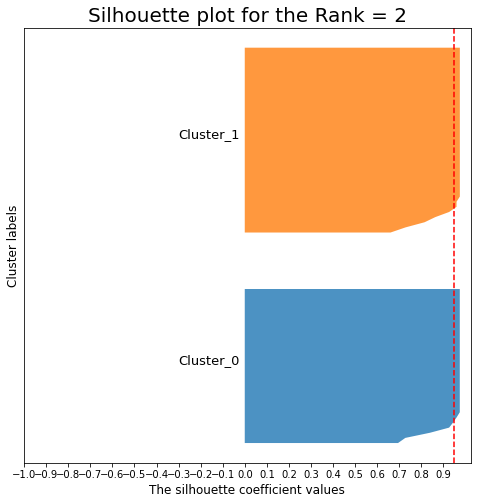

In [30]:
silhouette_plot(C_2, patient_clusters_2)

### **Explained Variance**

In [31]:
ex_var_best_fit, ex_var_random = {}, {}

In [32]:
# Explained Variance best fit
var_2 = nsnmf_2_fit.fit.evar()
print('Variance best model:', var_2)
ex_var_best_fit['Rank_2'] = var_2


# Explained Variance Random model
nsnmf_2_random = nimfa.Nsnmf(V, rank=2, n_run=1, max_iter=1)
nsnmf_2_random_fit = nsnmf_2_random()
var_2_random = nsnmf_2_random_fit.fit.evar()
print('Varince random model:', var_2_random)
ex_var_random['Rank_2'] = var_2_random

Variance best model: 0.9948700604033867
Varince random model: 0.012798260129012862


## **Rank = 3**

In [33]:
# Building the model with rank = 3
nsnmf_3 = nimfa.Nsnmf(V, rank=3, n_run=n_run, max_iter=max_iter, track_factor=True)
nsnmf_3_fit = nsnmf_3()

In [34]:
# Computing the cophenetic correlation coefficient
cophonetic_cor_coef_3 = nsnmf_3_fit.fit.coph_cor()
print('Cophenetic correlation coefficient:', cophonetic_cor_coef_3)

cophonetic_results['Rank_3'] = cophonetic_cor_coef_3

Cophenetic correlation coefficient: 0.9428246906106419


### **Consensus matrix**

<ipython-input-35-bf53b3894305>:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(C_3, method='average')


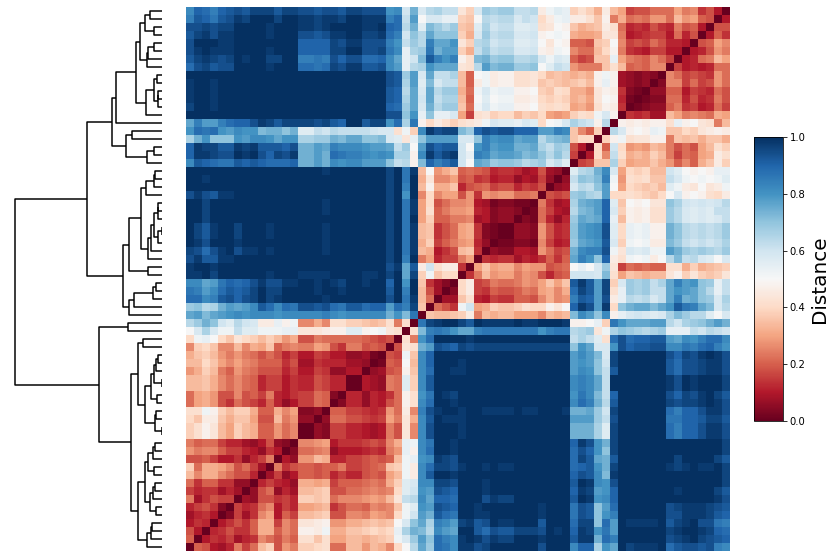

In [35]:
# plotting the Consensus matrix as an heatmap
def clean_axis(ax):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

fig = plt.figure(figsize=(13.9, 10))
heatmapGS = gridspec.GridSpec(1, 2, wspace=.01, hspace=0., width_ratios=[0.25, 1])

C_3 = 1 - nsnmf_3_fit.fit.consensus()
Y = sch.linkage(C_3, method='average') 

denAX = fig.add_subplot(heatmapGS[0, 0])
denD = sch.dendrogram(Y, orientation='left', link_color_func=lambda k: 'black')
clean_axis(denAX)

heatmapAX = fig.add_subplot(heatmapGS[0, 1])
D = C_3[denD['leaves'], :][:, denD['leaves']]
axi = heatmapAX.imshow(D, interpolation='nearest', aspect='equal', origin='lower', cmap='RdBu')
clean_axis(heatmapAX)

cb = fig.colorbar(axi, fraction=0.046, pad=0.04, aspect=10)
cb.set_label('Distance', fontsize=20)

# Saving the plot
plt.savefig(results_dir + '/Rank_3_Consensus_matrix.png')

### **W matrix**

In [36]:
# Computing the W basis matrix
W_3 = nsnmf_3_fit.fit.basis()

print(f'The shape of the W matrix is: {W_3.shape[0]} rows (proteins) x {W_3.shape[1]} columns (metaproteins)')

The shape of the W matrix is: 517 rows (proteins) x 3 columns (metaproteins)


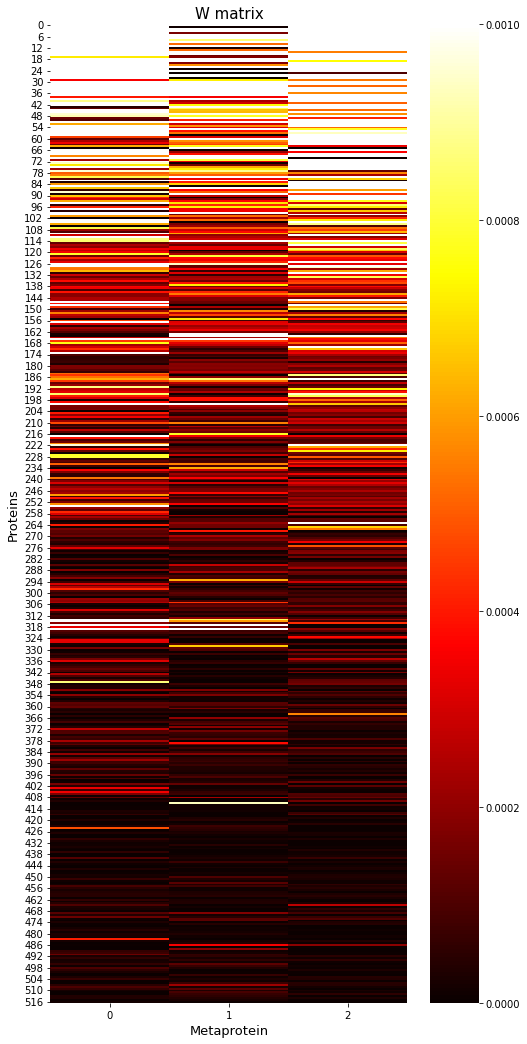

In [37]:
fig, ax = plt.subplots(figsize=(8, 18))

# Plotting the heatmap of the W matrix
sns.heatmap(W_3[: , : ], cmap='hot', vmax=0.001) #Try without setting vmax
plt.ylabel('Proteins', fontsize=13)
plt.xlabel('Metaprotein', fontsize=13)
plt.title('W matrix', fontsize=15)

# Saving the plot
plt.savefig(results_dir + '/Rank_3_W_matrix.png')

#### Visualizing for each cluster (metaprotein) the coefficient of the proteins

In [38]:
prot_clusters_dict_3 = k_proteins_of_metaprotein(W_3, 3)

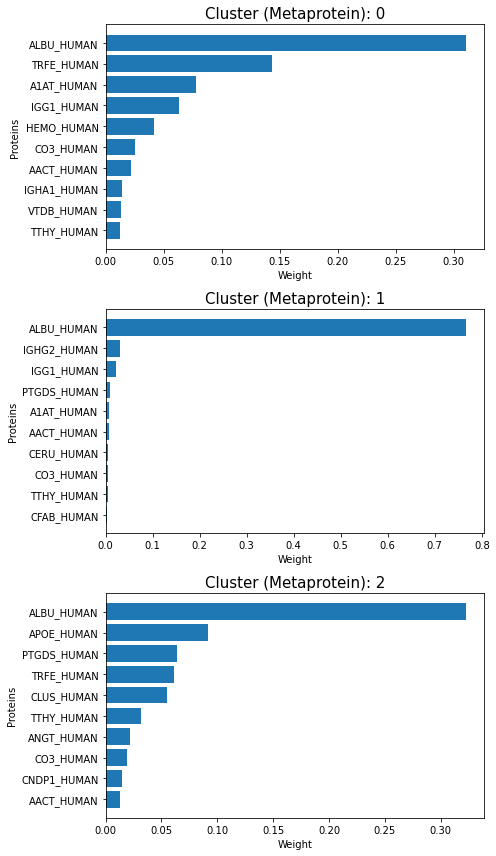

In [39]:
plotting_metaproteins(prot_clusters_dict_3)

### **H matrix**

In [40]:
# Computing the H coef matrix
H_3 = np.array(nsnmf_3_fit.fit.coef())

print(f'The shape of the H matrix is: {H_3.shape[0]} rows (metaprotein) x {H_3.shape[1]} columns (patients)')

The shape of the H matrix is: 3 rows (metaprotein) x 68 columns (patients)


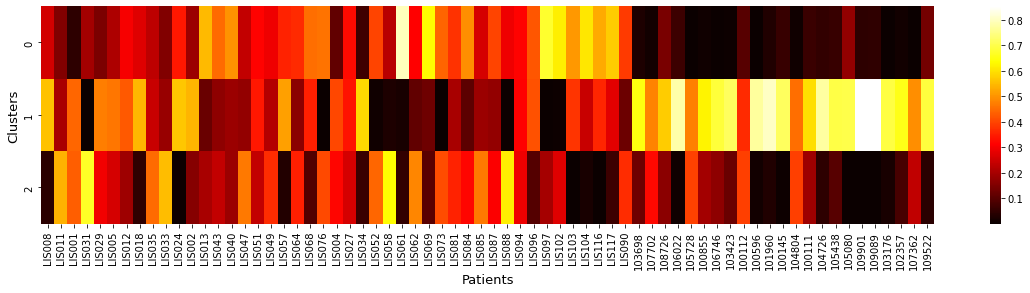

In [41]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.heatmap(H_3[: , : ], cmap='hot', xticklabels=patient_code) 
plt.ylabel('Clusters', fontsize=13)
plt.xlabel('Patients', fontsize=13)

# Saving the plot
plt.savefig(results_dir + '/Rank_3_H_matrix.png')

In [42]:
patient_clusters_3 = cluster_assign_patients(H_3)

In [43]:
clustered_patient_3 = grouping_patients_for_cluster(patient_clusters_3)

Cluster(Metaprotein)_0: ['LIS013', 'LIS043', 'LIS040', 'LIS064', 'LIS068', 'LIS076', 'LIS061', 'LIS069', 'LIS073', 'LIS081', 'LIS084', 'LIS087', 'LIS094', 'LIS096', 'LIS097', 'LIS102', 'LIS103', 'LIS104', 'LIS116', 'LIS117', 'LIS090'] - N° of patients: 21 

Cluster(Metaprotein)_1: ['LIS008', 'LIS001', 'LIS029', 'LIS005', 'LIS012', 'LIS018', 'LIS024', 'LIS002', 'LIS051', 'LIS057', 'LIS004', 'LIS027', 'LIS034', '103698', '107702', '108726', '106022', '105728', '100855', '106746', '103423', '100596', '101960', '100145', '104804', '100111', '104726', '105438', '105080', '109901', '109089', '103176', '102357', '107362', '109522'] - N° of patients: 35 

Cluster(Metaprotein)_2: ['LIS011', 'LIS031', 'LIS035', 'LIS033', 'LIS047', 'LIS049', 'LIS052', 'LIS058', 'LIS062', 'LIS085', 'LIS088', '100112'] - N° of patients: 12 



In [44]:
# Saving the clustered patients
f = open(results_dir + '/Rank_3_Clustered_patients.txt', 'w')

for cluster, patient in clustered_patient_3.items():
    lis_tot = 0 
    coi_tot = 0
    for pat in patient:
        if pat[0] == 'L':
            lis_tot += 1
        else:
            coi_tot += 1
    f.write(f'Cluster(Metaprotein)_{cluster}: \n{patient} \nNumber of patients: {len(patient)} \n- {lis_tot} Lisbon patients \n- {coi_tot} Coimbra patients\n')
    f.write('\n')

f.close()

Cluster 0 - Lisbon: 21
Cluster 0 - Coimbra: 0
Cluster 1 - Lisbon: 13
Cluster 1 - Coimbra: 22
Cluster 2 - Lisbon: 11
Cluster 2 - Coimbra: 1

For a total of 68 patients


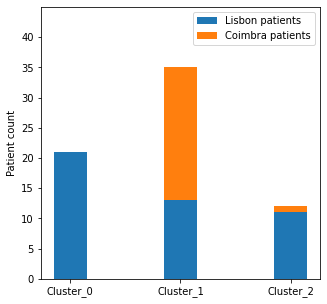

In [45]:
count_lisbon_pats = {}
count_coimbra_pats = {}
tot = 0

# Counting the patients
for cl, patients in clustered_patient_3.items():
    lis_tot = 0
    coi_tot = 0
    for pat in patients:
        if pat[0] == 'L':
            lis_tot += 1
        else:
            coi_tot += 1
    count_lisbon_pats[cl] = lis_tot
    count_coimbra_pats[cl] = coi_tot
    tot = tot + lis_tot + coi_tot
    
    print(f'Cluster {cl} - Lisbon: {lis_tot}')
    print(f'Cluster {cl} - Coimbra: {coi_tot}')
print()
print(f'For a total of {tot} patients')

count_lisbon_pats = dict(sorted(count_lisbon_pats.items(), key=lambda x:x[0]))
count_coimbra_pats = dict(sorted(count_coimbra_pats.items(), key=lambda x:x[0]))

max_list = []
for cl, count_pat in count_lisbon_pats.items():
    max_list.append(count_pat + count_coimbra_pats[cl])

# plotting
fig = plt.figure(figsize=(5,5))
ax = plt.subplot()

count_lis = list(count_lisbon_pats.values())
count_coi = list(count_coimbra_pats.values())

ax.bar(list(count_lisbon_pats.keys()), count_lis, width = 0.3, label='Lisbon patients')
ax.bar(list(count_coimbra_pats.keys()), count_coi, bottom=count_lis, width=0.3, label='Coimbra patients')

ax.set_ylim(0, np.max(max_list) + 10)
ax.set_xticks(range(len(count_lis)))
ax.set_xticklabels(['Cluster_0', 'Cluster_1', 'Cluster_2'])
ax.set_ylabel('Patient count')
ax.set_yticks(np.arange(0, np.max(max_list) + 10, step = 5.0))
ax.legend()

# Saving the plot 
plt.savefig(results_dir + '/Rank_3_Cluster_cohorts.png')

### **H matrix 3D plot**

Text(0.5, 0, 'Metaprotein_2')

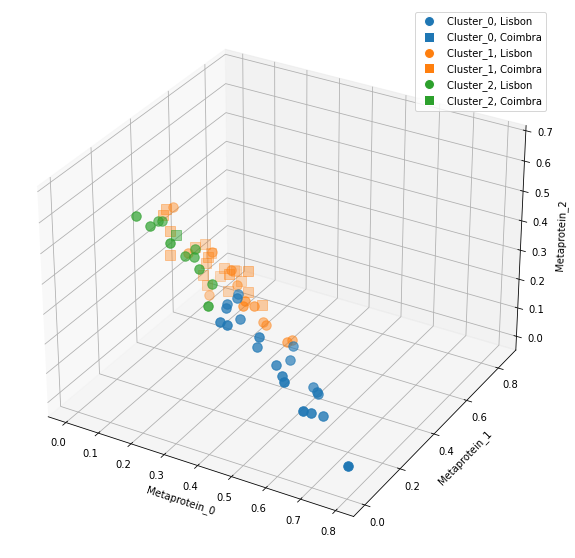

In [46]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:3]

legend_elements = [Line2D([0], [0], color='w', markerfacecolor=colors[0], marker ='o', label='Cluster_0, Lisbon', markersize = 10), 
                   Line2D([0], [0], color='w', markerfacecolor=colors[0], marker ='s', label='Cluster_0, Coimbra', markersize = 10),
                   Line2D([0], [0], color='w', markerfacecolor=colors[1], marker ='o', label='Cluster_1, Lisbon', markersize = 10),
                   Line2D([0], [0], color='w', markerfacecolor=colors[1], marker ='s', label='Cluster_1, Coimbra', markersize = 10),
                   Line2D([0], [0], color='w', markerfacecolor=colors[2], marker ='o', label='Cluster_2, Lisbon', markersize = 10),
                   Line2D([0], [0], color='w', markerfacecolor=colors[2], marker ='s', label='Cluster_2, Coimbra', markersize = 10)]

# Alpha for the shading
xmin = min(H_3[0])
ymin = min(H_3[1])
x_range = np.max(H_3[0]) - xmin
y_range = np.max(H_3[1]) - ymin

# legend_labels = []

clusters = ['Cluster_0', 'Cluster_1', 'Cluster_2']

for cl, patients in clustered_patient_3.items():
    label_lis_added = False
    label_coi_added = False
    # print(cl, patient)
    for pat in patients:
        idx_pat = patient_code.index(pat)
        x = H_3[0, idx_pat]
        y = H_3[1, idx_pat]
        z = H_3[2, idx_pat]
        cxalpha = 0.4 * ((x - xmin) / x_range)
        cyaplha = 0.4 - 0.4 * ((y - ymin) / y_range)
        alpha = cxalpha + cyaplha + 0.2 # minimum alpha 0.2
        label = clusters[cl]
        color = colors[cl]
        if pat[0] == 'L':
            marker = 'o'
            ax.scatter3D(x, y, z, color=color, alpha=alpha, marker=marker , s=90)
        else:
            marker = 's'
            ax.scatter3D(x, y, z, color=color, label=label + ', Coimbra', alpha=alpha, marker=marker, depthshade=True, s=90)
plt.legend(handles=legend_elements, loc='best')     
ax.set_xlabel('Metaprotein_0')
ax.set_ylabel('Metaprotein_1')
ax.set_zlabel('Metaprotein_2')

In [47]:
# INTERACTIVE

df_plot_3 = pd.DataFrame(columns=['patient_cluster', 'patient', 'cohort', 'Cluster_0', 'Cluster_1', 'Cluster_2'])
for idx, patient in enumerate(patient_code):
    if patient[0] == 'L':
        cohort = 'Lisbon'
    else:
        cohort = 'Coimbra'
    list_to_append = [int(patient_clusters_3[patient])] + [patient] + [cohort] + list(H_3[: , idx])
    df_plot_3.loc[idx] = list_to_append
# df_plot_3

# plotly.offline.init_notebook_mode()
fig = px.scatter_3d(df_plot_3, x='Cluster_0', y='Cluster_1', z='Cluster_2', 
                    color='patient_cluster',   
                    symbol='cohort', 
                    size_max=0.1, 
                    hover_name='patient')

fig.update_traces(marker=dict(size=7))
fig.update_layout(
    autosize=True,
    width=1000,
    height=1000,)

fig.write_image(results_dir + '/Rank_3_Clustered_patients.png')
fig.write_html(results_dir + '/Rank_3_Clustered_patients.html')

fig.show()

### **Computing the Silhouette Score**

In [48]:
silhouette_score_3 = silhouette_score(C_3, list(patient_clusters_3.values()))
print(silhouette_score_3)

silhouette_results['Rank_3'] = silhouette_score_3

0.3638562401017472


Silhouette average score: 0.3638562401017464


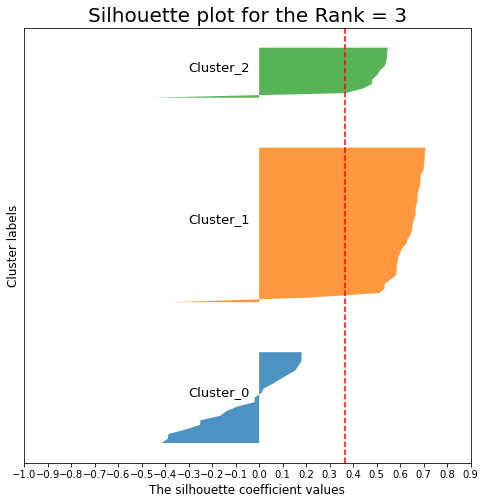

In [49]:
silhouette_plot(C_3, patient_clusters_3)

### **Explained Variance**

In [50]:
# Explained Variance best fit
var_3 = nsnmf_3_fit.fit.evar()
print('Variance best model:', var_3)
ex_var_best_fit['Rank_3'] = var_3

# Explained Variance Random model
nsnmf_3_random = nimfa.Nsnmf(V, rank=3, n_run=1, max_iter=1)
nsnmf_3_random_fit = nsnmf_3_random()
var_3_random = nsnmf_3_random_fit.fit.evar()
print('Variance random model:', var_3_random)
ex_var_random['Rank_3'] = var_3_random

Variance best model: 0.9949593005890266
Variance random model: 0.011196889545966648


### **Labelling (clustering) the proteins**

#### **Normalize the proteins expression levels of the V-matrix, computing the Z-score, according to the control group**

The Z-score is computed with the formula $Z = \frac{x - \mu}{\delta}$,  Where:   
- $x$ is the expression level of that protein in that specific A-beta positve patient
- $\mu$ is the mean of that protein in all the A-beta negative patients (control patients)
- $\delta$ is the standard deviation of that protein over all the expression levels in all the A-beta negative patients (control patients)

In [51]:
# Importing the Amyloid beta positive Dataset
ab_neg_df = pd.read_excel('Lisbon_and_Coimbra_517_Proteomics.xlsx', sheet_name='517_Negative', index_col=0)

# Storing the Uniprot code of the proteins
uniprot_code_neg = list(ab_neg_df.loc['Uniprot_code', :])
# Dropping the Uniprot code row
ab_neg_df = ab_neg_df.drop(['Uniprot_code'], axis=0)

# Storing the patients code
patient_code_neg = list(ab_neg_df.index)

# Storing the proteins code
protein_code_neg = list(ab_neg_df.columns)

# Transposing the dataframe
ab_neg_df = ab_neg_df.T

# Generating the V numpy matrix
V_neg = ab_neg_df.values

In [52]:
print(f'The A-beta negative dataframe has dimension: \n {V_neg.shape[0]} rows (proteins) x {V_neg.shape[1]} columns (patients)')

ab_neg_df

The A-beta negative dataframe has dimension: 
 517 rows (proteins) x 60 columns (patients)


Sample code    LIS017    LIS007    LIS026    LIS009    LIS010    LIS038  \
ALBU_HUMAN   0.356318  0.386206  0.487252  0.349113  0.326597  0.262566   
TRFE_HUMAN   0.064232  0.047139  0.029375  0.071905  0.064845  0.099774   
TTHY_HUMAN   0.015572  0.011901  0.019694  0.013097  0.018108  0.019711   
PTGDS_HUMAN  0.016359  0.012724  0.013325   0.01628  0.024601  0.028523   
FBLN1_HUMAN   0.00405  0.001745  0.002766  0.002784  0.002848  0.003217   
...               ...       ...       ...       ...       ...       ...   
DSG2_HUMAN   0.000042  0.000026  0.000038  0.000043  0.000049  0.000028   
CO6A2_HUMAN  0.000013  0.000016  0.000181  0.000025  0.000031  0.000096   
LV223_HUMAN  0.000043  0.000016  0.000005  0.000008   0.00006  0.000064   
MOES_HUMAN   0.000007       0.0  0.000003  0.000008  0.000015  0.000017   
CSPG4_HUMAN  0.000005   0.00001  0.000008  0.000011  0.000004  0.000011   

Sample code    LIS039    LIS067    LIS071    LIS021  ...    107080    107461  \
ALBU_HUMAN    0.28266  0.289263  0.479895   0.43604  ...  0.465167  0.441823   
TRFE_HUMAN   0.062658  0.050341  0.031451  0.053369  ...  0.024227  0.059049   
TTHY_HUMAN   0.018951   0.02256  0.012957  0.017765  ...  0.012798  0.018366   
PTGDS_HUMAN  0.020166  0.020578  0.015482  0.016478  ...  0.018302  0.020053   
FBLN1_HUMAN  0.002687  0.004679  0.002958  0.002887  ...  0.001355  0.002471   
...               ...       ...       ...       ...  ...       ...       ...   
DSG2_HUMAN   0.000064  0.000034  0.000029  0.000035  ...  0.000186  0.000016   
CO6A2_HUMAN  0.000103  0.000021  0.000005  0.000007  ...  0.000028  0.000021   
LV223_HUMAN  0.000035   0.00002  0.000009  0.000012  ...  0.000013  0.000004   
MOES_HUMAN   0.000008  0.000023  0.000024  0.000002  ...  0.000065  0.000002   
CSPG4_HUMAN  0.000007  0.000006  0.000003  0.000004  ...  0.000004  0.000007   

Sample code    103293    106583    104251    102434    102721    107282  \
ALBU_HUMAN   0.551673  0.591544  0.484754  0.454773   0.55746  0.526771   
TRFE_HUMAN   0.025541  0.047936  0.046519  0.028144  0.027974  0.042759   
TTHY_HUMAN   0.015553  0.009104  0.015312  0.011741  0.007726  0.013606   
PTGDS_HUMAN   0.02108  0.014606   0.01955  0.017558  0.016269  0.021253   
FBLN1_HUMAN  0.002328  0.002253  0.003277  0.001922  0.002062  0.003007   
...               ...       ...       ...       ...       ...       ...   
DSG2_HUMAN   0.000025  0.000099  0.000024  0.000037  0.000018  0.000014   
CO6A2_HUMAN   0.00005  0.000038   0.00031  0.000038  0.000027  0.000007   
LV223_HUMAN   0.00002  0.000096  0.000018  0.000016  0.000011  0.000012   
MOES_HUMAN   0.000012  0.000002  0.000009  0.000012  0.000013  0.000006   
CSPG4_HUMAN  0.000017  0.000025   0.00001  0.000006  0.000002  0.000005   

Sample code    102037    108810  
ALBU_HUMAN   0.520683  0.531174  
TRFE_HUMAN   0.048271  0.044518  
TTHY_HUMAN   0.012243  0.013608  
PTGDS_HUMAN  0.009742  0.011754  
FBLN1_HUMAN  0.002172  0.001713  
...               ...       ...  
DSG2_HUMAN   0.000022   0.00002  
CO6A2_HUMAN  0.000357   0.00002  
LV223_HUMAN  0.000012  0.000003  
MOES_HUMAN    0.00001  0.000027  
CSPG4_HUMAN  0.000007  0.000005  

[517 rows x 60 columns]

In [53]:
# mean = np.mean(list(ab_neg_df.loc['DPP6_HUMAN', :]))
# print(mean)
# sd = np.std(list(ab_neg_df.loc['DPP6_HUMAN', :]))
# print(sd)
# val = ab_pos_df.loc['DPP6_HUMAN', 'L33']
# print(val)

# print((val - mean) / sd)

In [54]:
# Computing the mean and the SD for each of the proteins in the A-beta negative patients
mean_sd_prot_negative = {}

for idx, protein in enumerate(protein_code_neg):
    # Storing for each protein its mean and SD
    mean_sd_prot_negative[protein] = [np.mean(V_neg[idx]), np.std(V_neg[idx])]

# Computing the Z-score for each of the expression values in the A-beta positive matrix
z_score_matrix = []

for idx, protein in enumerate(protein_code):
    mean = mean_sd_prot_negative[protein][0]
    std = mean_sd_prot_negative[protein][1]
    # print(protein)
    # print(mean_sd_prot_negative[protein])
    # print(V[idx])
    new_list = (V[idx] - mean) / std # (x - mean)/std
    z_score_matrix.append(new_list)

z_score_matrix = np.array(z_score_matrix)

z_score_df = pd.DataFrame(z_score_matrix, index=protein_code, columns=patient_code)

z_score_df

LIS008    LIS011    LIS001    LIS031    LIS029    LIS005  \
ALBU_HUMAN    0.32267  -0.33453  0.638221 -1.368854  0.484934  0.493378   
TRFE_HUMAN  -0.800757  1.186845  0.902311 -0.227466  0.459656  0.992545   
TTHY_HUMAN    0.35715  0.601411 -0.405497  0.138829 -0.393956 -0.366822   
PTGDS_HUMAN -0.451914  2.250462  2.379846  2.446296  0.947285  0.264956   
FBLN1_HUMAN  0.751021  0.388689  0.649425  1.025332 -0.475918 -0.206652   
...               ...       ...       ...       ...       ...       ...   
DSG2_HUMAN   -0.25565 -0.526429 -0.559816  0.513446 -0.296312  0.732912   
CO6A2_HUMAN  -0.39752 -0.259891 -0.483783 -0.264355 -0.290417 -0.600977   
LV223_HUMAN -0.794908  0.635114  1.118438  1.117024 -0.767559 -0.613252   
MOES_HUMAN  -0.701719 -0.809733 -0.781464 -0.625501 -0.825098 -0.750086   
CSPG4_HUMAN -0.725291 -1.122795 -0.823338 -0.778547 -1.117133 -1.185472   

               LIS012    LIS018    LIS035    LIS033  ...    100111    104726  \
ALBU_HUMAN   0.340486  0.315885  -0.11268 -0.361511  ...  0.008353  0.944508   
TRFE_HUMAN   0.511968 -0.638027  1.501628  1.546689  ... -1.271939 -1.111523   
TTHY_HUMAN  -0.769681 -1.580583 -1.032359 -0.935572  ... -1.893335 -1.269018   
PTGDS_HUMAN -0.081089  -0.73262  1.364099  1.689963  ...  0.164758 -0.615974   
FBLN1_HUMAN  -0.24074 -1.317834  0.283692  0.959021  ... -0.912429 -0.853045   
...               ...       ...       ...       ...  ...       ...       ...   
DSG2_HUMAN  -0.123635  0.004023 -0.886764 -0.445866  ... -0.264911  1.510308   
CO6A2_HUMAN -0.546161 -0.273743 -0.367965 -0.469052  ... -0.087798 -0.245751   
LV223_HUMAN  0.378106 -0.385332 -0.741379 -0.896688  ...   0.50777 -0.106233   
MOES_HUMAN   0.091445  3.411346 -0.778861  0.685029  ...  0.037459 -0.741695   
CSPG4_HUMAN  -0.97282 -0.166537 -0.342305 -1.133176  ... -0.664097 -0.992955   

               105438    105080    109901    109089    103176    102357  \
ALBU_HUMAN   0.433075  0.790085  1.325029    1.5654 -0.454523 -0.562429   
TRFE_HUMAN  -1.115984 -0.532513 -1.351567 -0.677891 -1.421493 -1.559284   
TTHY_HUMAN   -1.35098 -1.447117 -1.510656 -1.652883 -2.108452 -1.784068   
PTGDS_HUMAN -0.129049 -0.848343 -0.948915 -0.961199  -1.09185 -0.156247   
FBLN1_HUMAN -1.138125 -2.356181 -2.373472 -1.838482 -2.490277  -1.89068   
...               ...       ...       ...       ...       ...       ...   
DSG2_HUMAN    -0.3894  0.196985 -0.128044 -0.312827 -0.508896  1.128068   
CO6A2_HUMAN  0.101947 -0.406704 -0.506968 -0.397197 -0.585394  1.293743   
LV223_HUMAN -0.573016 -0.235717  0.963797 -0.025628 -0.485693 -0.083325   
MOES_HUMAN   0.843391  0.284982  -0.43586 -0.036663  0.686424 -0.273583   
CSPG4_HUMAN  -0.69699 -0.116199 -0.126607 -0.289279 -1.000156 -0.898075   

               107362    109522  
ALBU_HUMAN  -1.166072  0.770257  
TRFE_HUMAN  -1.349705  0.111586  
TTHY_HUMAN  -0.911039 -0.859687  
PTGDS_HUMAN  1.060603 -1.067006  
FBLN1_HUMAN -1.656225 -0.207951  
...               ...       ...  
DSG2_HUMAN   0.095254  -0.10766  
CO6A2_HUMAN -0.334994  0.150863  
LV223_HUMAN -0.381557  2.482396  
MOES_HUMAN   0.496394 -0.172437  
CSPG4_HUMAN -1.010842 -1.097474  

[517 rows x 68 columns]

In [55]:
z_score_df.to_excel(results_dir + '/z_score_proteins.xlsx')

#### Clustering the proteins

In [56]:
# Clustering the proteins according to both the highest average values and the NMF prediction method
def protein_clustering(nsnmf_model, patient_clusters, protein_code, V):

    ''' -------- Labelling the proteins with the NMF model ------------ '''
    protein_cluster_nmf = np.array(nsnmf_model.fit.predict(what='features'))
    protein_cluster_nmf = protein_cluster_nmf[0]


    ''' -------- Labelling the proteins according to which cluster showed the highest average level --------- '''
    mean_protein_val_cluster = {}

    # Storing for each protein its expression value for each patient that belong to a certain cluster
    for idx_pat, cluster in enumerate(list(patient_clusters.values())):
        for idx_prot, protein in enumerate(protein_code):
            expression_level = V[idx_prot, idx_pat]
            if cluster in mean_protein_val_cluster.keys():
                if protein in mean_protein_val_cluster[cluster].keys():
                    mean_protein_val_cluster[cluster][protein].append(expression_level)
                else:
                    mean_protein_val_cluster[cluster][protein] = [expression_level]
            else:
                mean_protein_val_cluster[cluster] = {str(protein): [expression_level]}

    # print(mean_protein_val_cluster)

    # computing the mean of each of the proteins
    for cluster in mean_protein_val_cluster.keys():
        for protein, val in mean_protein_val_cluster[cluster].items():
            mean_protein_val_cluster[cluster][protein] = [np.mean(val), np.std(val)] #str(np.mean(val)) + ' +/- ' + str(np.std(val))  
    
    # print(mean_protein_val_cluster)
    mean_protein_val_cluster = dict(sorted(mean_protein_val_cluster.items(), key= lambda x : x[0]))

    # assigning proteins to clusters according to the average mean value of the protein within the cluster
    protein_cluster_val = []

    for protein in protein_code:
        clusters = []
        means = []
        for clt in mean_protein_val_cluster.keys():
            clusters.append(clt)
            means.append(mean_protein_val_cluster[clt][protein][0])
        idx_max = means.index(np.max(means))
        protein_cluster_val.append(clusters[idx_max])

    # Generating the final dataframe
    clustered_proteins_df = pd.DataFrame(index = protein_code)

    for cluster, values in mean_protein_val_cluster.items():
        serie_to_append_mean = pd.Series(np.array(list(mean_protein_val_cluster[cluster].values()))[: , 0], index=protein_code)
        serie_to_append_std = pd.Series(np.array(list(mean_protein_val_cluster[cluster].values()))[: , 1], index=protein_code)
        clustered_proteins_df['Cluster_'+str(cluster)+'_Mean'] = serie_to_append_mean
        clustered_proteins_df['Std_'+str(cluster)] = serie_to_append_std

    # appending the cluster obtained from the highest average level of the proteins
    protein_cluster_val_series = pd.Series(protein_cluster_val, index=protein_code)
    clustered_proteins_df['Cluster with higher protein levels'] = protein_cluster_val_series
    # appendig the cluster obtained from the NMF protein clusterization
    protein_cluster_nmf_series = pd.Series(protein_cluster_nmf, index=protein_code)
    clustered_proteins_df['NMF protein cluster'] = protein_cluster_nmf_series

    return protein_cluster_nmf, np.array(protein_cluster_val), clustered_proteins_df

In [57]:
protein_cluster_nmf_3, protein_cluster_val_3, clustered_proteins_df_3 = protein_clustering(nsnmf_model=nsnmf_3_fit, patient_clusters=patient_clusters_3, protein_code=protein_code, V=z_score_matrix)

In [58]:
clustered_proteins_df_3

Cluster_0_Mean     Std_0  Cluster_1_Mean     Std_1  \
ALBU_HUMAN        -0.737372  0.684373        0.247519  0.545361   
TRFE_HUMAN         1.789598  1.048693       -0.519442  0.782509   
TTHY_HUMAN        -0.689901  0.905763       -1.215096  0.592854   
PTGDS_HUMAN       -0.188665  0.778489       -0.209956  1.006463   
FBLN1_HUMAN        0.660663  1.079295       -0.753106  0.850189   
...                     ...       ...             ...       ...   
DSG2_HUMAN        -0.418263  0.346654        0.341502  1.508154   
CO6A2_HUMAN       -0.337209  0.215177       -0.292405  0.361731   
LV223_HUMAN       -0.062009  0.942823        0.031355  0.817890   
MOES_HUMAN        -0.219548  0.591381       -0.020186  0.833220   
CSPG4_HUMAN       -0.082406  0.999515       -0.403749  0.732431   

             Cluster_2_Mean     Std_2  Cluster with higher protein levels  \
ALBU_HUMAN        -0.673531  0.441010                                   1   
TRFE_HUMAN         1.264504  0.679295                                   0   
TTHY_HUMAN        -0.493931  0.751634                                   2   
PTGDS_HUMAN        1.585927  0.562388                                   2   
FBLN1_HUMAN        0.966611  0.699176                                   2   
...                     ...       ...                                 ...   
DSG2_HUMAN         0.258206  1.789999                                   1   
CO6A2_HUMAN       -0.406834  0.107429                                   1   
LV223_HUMAN       -0.012824  0.896064                                   1   
MOES_HUMAN        -0.286394  0.792173                                   1   
CSPG4_HUMAN       -0.482768  0.675227                                   0   

             NMF protein cluster  
ALBU_HUMAN                     1  
TRFE_HUMAN                     0  
TTHY_HUMAN                     2  
PTGDS_HUMAN                    2  
FBLN1_HUMAN                    2  
...                          ...  
DSG2_HUMAN                     1  
CO6A2_HUMAN                    1  
LV223_HUMAN                    1  
MOES_HUMAN                     1  
CSPG4_HUMAN                    0  

[517 rows x 8 columns]

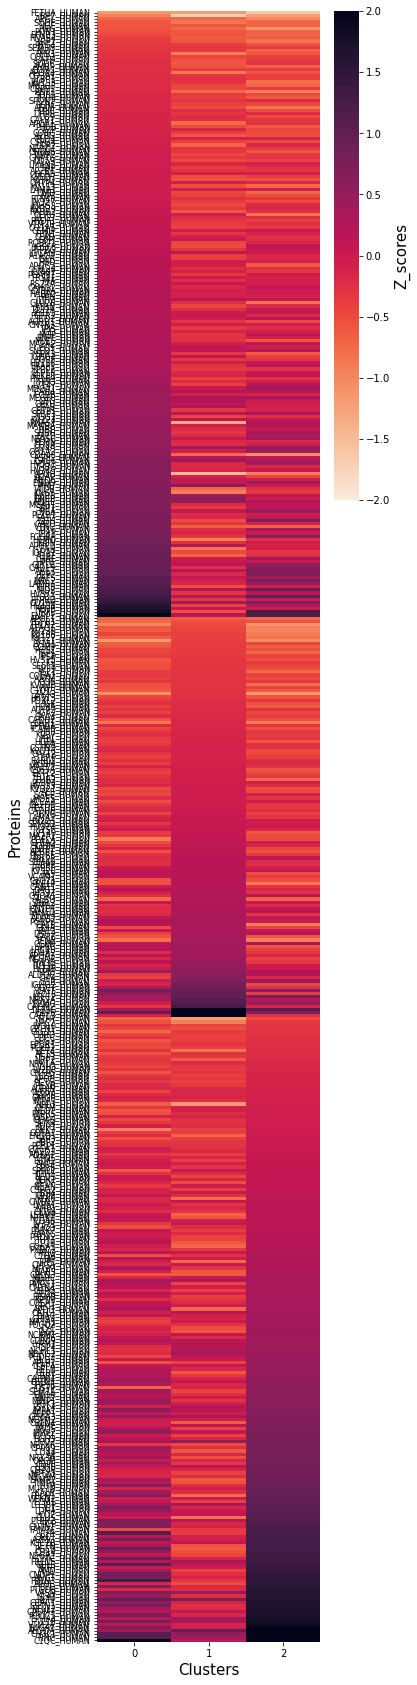

In [59]:
clustered_proteins_matrix_3 = clustered_proteins_df_3.values
clustered_proteins_matrix_means = []

for row in clustered_proteins_matrix_3:
    clustered_proteins_matrix_means.append(row[:-2:2]) 

clustered_proteins_matrix_means = np.array(clustered_proteins_matrix_means)
# clustered_proteins_matrix_means = np.array(sorted(clustere_proteins_matrix_means, key= lambda x:x[0], reverse=True))

# print(clustered_proteins_matrix_means.shape)
# print(protein_cluster_val_3)

sorted_proteins_for_cluster_0 = {}
sorted_proteins_for_cluster_1 = {}
sorted_proteins_for_cluster_2 = {}

for idx, cluster in enumerate(protein_cluster_val_3):
    # print(cluster)
    # print(clustered_proteins_matrix_means[idx])
    if cluster == 0:
        sorted_proteins_for_cluster_0[protein_code[idx]] = clustered_proteins_matrix_means[idx]
    if cluster == 1:
        sorted_proteins_for_cluster_1[protein_code[idx]] = clustered_proteins_matrix_means[idx]
    if cluster == 2:
        sorted_proteins_for_cluster_2[protein_code[idx]] = clustered_proteins_matrix_means[idx]

sorted_proteins_for_cluster_0 = dict(sorted(sorted_proteins_for_cluster_0.items(), key= lambda x : x[1][0]))
sorted_proteins_codes_0 = np.array(list(sorted_proteins_for_cluster_0.keys()))
sorted_proteins_values_0 = np.array(list(sorted_proteins_for_cluster_0.values()))
sorted_proteins_for_cluster_1 = dict(sorted(sorted_proteins_for_cluster_1.items(), key= lambda x : x[1][1]))
sorted_proteins_codes_1 = np.array(list(sorted_proteins_for_cluster_1.keys()))
sorted_proteins_values_1 = np.array(list(sorted_proteins_for_cluster_1.values()))
sorted_proteins_for_cluster_2 = dict(sorted(sorted_proteins_for_cluster_2.items(), key= lambda x : x[1][2]))
sorted_proteins_codes_2 = np.array(list(sorted_proteins_for_cluster_2.keys()))
sorted_proteins_values_2 = np.array(list(sorted_proteins_for_cluster_2.values()))

total_sorted_proteins_val_for_cluster = np.concatenate((sorted_proteins_values_0, sorted_proteins_values_1, sorted_proteins_values_2), axis=0)
total_sorted_proteins_code_for_cluster = np.concatenate((sorted_proteins_codes_0, sorted_proteins_codes_1, sorted_proteins_codes_2), axis = 0)

# print(total_sorted_proteins_val_for_cluster.shape)

# Generating the heatmap
fig = plt.figure(figsize=(5, 30))

ax = sns.heatmap(total_sorted_proteins_val_for_cluster, yticklabels=total_sorted_proteins_code_for_cluster, cmap='rocket_r', vmax=2, vmin=-2, cbar_kws={'location': 'right', 'anchor': (1.0, 1.0), 'shrink': 0.3, 'label': 'Z_scores'}) # RdBu_r
plt.yticks(fontsize=8)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Proteins', fontsize = 15)
ax.figure.axes[-1].yaxis.label.set_size(15)

# Saving the plot
plt.savefig(results_dir + '/Rank_3_Heatmap_clustered_proteins.png')

In [60]:
# Sorting the clustered_proteins_df and save the matrix
sorted_clustered_proteins_df = clustered_proteins_df_3
sorted_clusterd_proteins_df = sorted_clustered_proteins_df.reindex(total_sorted_proteins_code_for_cluster)
# Saving the matrix
sorted_clusterd_proteins_df.to_excel(results_dir + '/Rank_3_Clustered_proteins.xlsx')

Clustered protein for the NMF model:
 {'Cluster_0': 186, 'Cluster_1': 122, 'Cluster_2': 209}

Clustered protein for the average values:
 {'Cluster_0': 192, 'Cluster_1': 127, 'Cluster_2': 198}


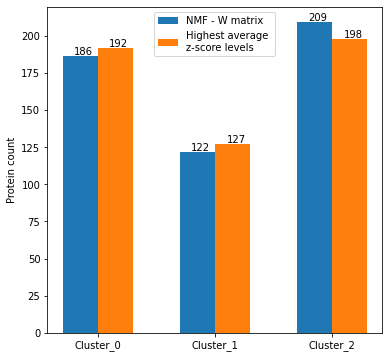

In [61]:
# Counting the number of proteins clusterized with NMF and with highest average levels

count_protein_for_cluster_nmf = {}

for cl in list(clustered_proteins_df_3['NMF protein cluster']):
    if 'Cluster_' + str(cl) not in count_protein_for_cluster_nmf.keys():
        count_protein_for_cluster_nmf['Cluster_' + str(cl)] = 1
    else:
        count_protein_for_cluster_nmf['Cluster_' + str(cl)] += 1

count_protein_for_cluster_nmf = dict(sorted(count_protein_for_cluster_nmf.items(), key=lambda x:x[0]))

print('Clustered protein for the NMF model:\n', count_protein_for_cluster_nmf)
print()

count_protein_for_cluster_average = {}

for cl in list(clustered_proteins_df_3['Cluster with higher protein levels']):
    if 'Cluster_' + str(cl) not in count_protein_for_cluster_average.keys():
        count_protein_for_cluster_average['Cluster_' + str(cl)] = 1
    else:
        count_protein_for_cluster_average['Cluster_' + str(cl)] += 1

count_protein_for_cluster_average = dict(sorted(count_protein_for_cluster_average.items(), key=lambda x : x[0]))

print('Clustered protein for the average values:\n',count_protein_for_cluster_average)

# Plotting the cluster's protein counts

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()

nmf_prot = list(count_protein_for_cluster_nmf.keys())
val_prot = list(count_protein_for_cluster_average.keys())

width = 0.3
ind = np.arange(len(nmf_prot))

ax.bar(nmf_prot, list(count_protein_for_cluster_nmf.values()), width=width, label = 'NMF - W matrix')
ax.bar(ind + width, list(count_protein_for_cluster_average.values()), width=width, label = 'Highest average \nz-score levels')

ax.set_ylabel('Protein count')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(['Cluster_0', 'Cluster_1', 'Cluster_2'])

# for i, v in (count_protein_for_cluster_nmf.items()):
#     print(idx)

nmf_count = list(count_protein_for_cluster_nmf.values())
val_count = list(count_protein_for_cluster_average.values())

for idx in range(len(nmf_prot)):
    ax.annotate(str(nmf_count[idx]), (idx - 0.05, nmf_count[idx] + 1))
    ax.annotate(str(val_count[idx]), (idx - 0.05 + width, val_count[idx] + 1))

ax.legend(loc='best');

# Saving the plot
plt.savefig(results_dir + '/Rank_3_Protein_clusters_NMF_zscore.png')

In [62]:
# # Printing the proteins for cluster 
# cluster = 0

# for index in clustered_proteins_df_3.index:
#     if clustered_proteins_df_3.loc[index, 'Cluster with higher protein levels'] == cluster:
#         print(index)

#### Determining the most expressed proteins for each cluster

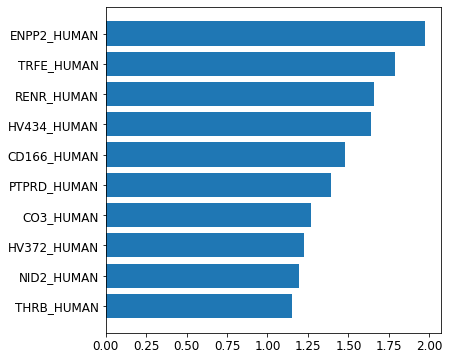

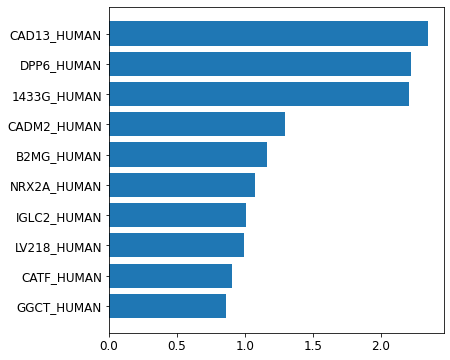

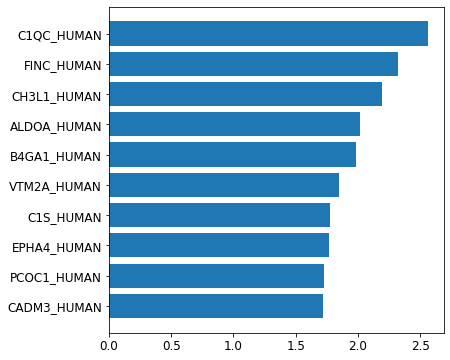

In [63]:
protein_clustered_val_3 = {'0': {}, '1': {}, '2': {}}
protein_clustered_std_3 = {'0': {}, '1': {}, '2': {}}

average_protein_level_clusters = np.array(clustered_proteins_df_3.values)

for idx, protein in enumerate(protein_code):
    cl_prot = str(protein_cluster_val_3[idx])
    # max_exp_level_mean = np.max(average_protein_level_clusters[idx, : ][:-2:2])
    list_mean_std = average_protein_level_clusters[idx, : ][:-2]
    mean_list = list(list_mean_std[::2])
    std_list = list(list_mean_std[1::2])
    idx_max = mean_list.index(np.max(mean_list))
    max_exp_level_mean = mean_list[idx_max]
    max_exp_level_std = std_list[idx_max]
    protein_clustered_val_3[str(cl_prot)][str(protein)] = max_exp_level_mean
    protein_clustered_std_3[str(cl_prot)][str(protein)] = max_exp_level_std
    

# cluster = '0' # Changing the number of the cluster for which you want to see the highest expressed proteins

for cluster in  ['0', '1', '2']:
    protein_cluster = list(protein_clustered_val_3[cluster].keys())
    protein_val = list(protein_clustered_val_3[cluster].values())
    protein_std = list(protein_clustered_std_3[cluster].values())
    sorted_idx = np.argsort(protein_val)[::-1]
    # print(sorted_idx)

    # for idx in sorted_idx:
    #     print(protein_cluster[idx], end='\n\n')

    fig, ax = plt.subplots(figsize=(6, 6))

    first_ten = sorted_idx[:10][::-1]
    # print(first_ten)
    # protein_cluster_first_ten = [prot for prot in protein_cluster[first_ten]]
    protein_cluster_first = []
    protein_val_first = []
    # protein_std_first = []
    for idx in first_ten:
        protein_cluster_first.append(protein_cluster[idx])
        protein_val_first.append(protein_val[idx])
        # protein_std_first.append(protein_std[idx])

    # protein_std_first = [5 for i in range(len(protein_std_first))]

    ax.barh(protein_cluster_first, protein_val_first, capsize=5) #xerr=protein_std_first
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12);

    plt.savefig(results_dir + '/Rank_3_Protein_cluster_' + cluster + '.png', bbox_inches = "tight")

In [64]:
# print(protein_clustered_val_3)

for cluster in ['0', '1', '2']:

    df_prot_zscore = pd.DataFrame(columns=['protein', 'z_score'])

    i = 0

    for prot, val in protein_clustered_val_3[cluster].items():
        list_to_append = [prot, val]
        df_prot_zscore.loc[i] = list_to_append
        i += 1

    df_prot_zscore = df_prot_zscore.sort_values('z_score', ignore_index=True, ascending=False)

    # Saving in an excel file
    df_prot_zscore.to_excel(results_dir + '/Rank_3_Protein_cluster_' + cluster + '_3.xlsx')

In [65]:
# df_prot_zscore.to_excel('Results_165/prot_zscore_cl.xlsx')

#### **Comparing our proteins clusters with Tijms' clusters**

In [66]:
# Loading the Tijms protein-clusters dataset
tijms_clusters_df = pd.read_excel('Lisbon_and_Coimbra_409_proteins_analysis.xlsx', sheet_name='Cell_type_Tijms', index_col=[0])
tijms_uniprot_code = list(tijms_clusters_df['Uniprot'])
tijms_list_clusters = list(tijms_clusters_df['Subtype with highest levels'])
# Our list clusters 
our_list_clusters = clustered_proteins_df_3['Cluster with higher protein levels']

In [67]:
not_found_count = 0
our_proteins_clusters = {}
tijms_proteins_clusters = {}

for idx, uniprot in enumerate(uniprot_code):
    if uniprot not in tijms_uniprot_code:
        # print(uniprot, protein_code[idx])
        not_found_count += 1
    elif uniprot in tijms_uniprot_code:
        idx_tijms = tijms_uniprot_code.index(uniprot)
        tijms_cluster = tijms_list_clusters[idx_tijms]
        our_cluster = our_list_clusters[idx] + 1
        if our_cluster not in our_proteins_clusters.keys():
            our_proteins_clusters[our_cluster] = [uniprot]
        else:
            our_proteins_clusters[our_cluster].append(uniprot)
        if tijms_cluster not in tijms_proteins_clusters.keys():
            tijms_proteins_clusters[tijms_cluster] = [uniprot]
        else:
            tijms_proteins_clusters[tijms_cluster].append(uniprot)

# Sorting the dictionary by the cluter number
tijms_proteins_clusters = dict(sorted(tijms_proteins_clusters.items(), key=lambda x:x[0]))
our_proteins_clusters = dict(sorted(our_proteins_clusters.items(), key=lambda x:x[0]))

# print(our_proteins_clusters)
# print(tijms_proteins_clusters)

# Comparing our clusters and the Tijms' one
count_our_cluster_tijms_cluster = {}
for our_cluster, our_proteins_list in our_proteins_clusters.items():
    protein_tijms_clusters = {}
    for our_protein in our_proteins_list:
        for tijms_cluster, tijms_proteins_list in tijms_proteins_clusters.items():
            if our_protein in tijms_proteins_list:
                if tijms_cluster not in protein_tijms_clusters.keys():
                    protein_tijms_clusters[tijms_cluster] = 1
                else:
                    protein_tijms_clusters[tijms_cluster] += 1

    protein_tijms_clusters = dict(sorted(protein_tijms_clusters.items(), key=lambda x:x[0]))

    count_our_cluster_tijms_cluster[our_cluster] = protein_tijms_clusters

# print(count_our_cluster_tijms_cluster)

# Printing out the results
for our_cluster, dict_count in count_our_cluster_tijms_cluster.items():
    print('For our cluster', our_cluster, ', there are:')
    for tijms_custer, count in dict_count.items():
        print(f'- {count} proteins in the Tijms cluster {tijms_custer}')       
print()
count = 0
for final_dict in count_our_cluster_tijms_cluster.values():
    count += sum(final_dict.values())
print('For a total of', count, 'proteins')  
print()
print(f'{not_found_count} proteins are not present in the Tijms work')

# Saving these results in a txt file
file = open(results_dir + '/Rank_3_Comparison_protein_cluster_with_Tijms.txt', 'w')
for our_cluster, dict_count in count_our_cluster_tijms_cluster.items():
    file.write(f'For our cluster {our_cluster}, there are:\n')
    for tijms_custer, count in dict_count.items():
        file.write(f'- {count} proteins in the Tijms cluster {tijms_custer}\n')       
file.write('\n')
count = 0
for final_dict in count_our_cluster_tijms_cluster.values():
    count += sum(final_dict.values())
file.write(f'For a total of {count} proteins')  
file.write('\n')
file.write(f'{not_found_count} proteins are not present in the Tijms work')

file.close()

For our cluster 1 , there are:
- 36 proteins in the Tijms cluster 1
- 33 proteins in the Tijms cluster 2
- 38 proteins in the Tijms cluster 3
For our cluster 2 , there are:
- 37 proteins in the Tijms cluster 1
- 19 proteins in the Tijms cluster 2
- 14 proteins in the Tijms cluster 3
For our cluster 3 , there are:
- 92 proteins in the Tijms cluster 1
- 48 proteins in the Tijms cluster 2
- 9 proteins in the Tijms cluster 3

For a total of 326 proteins

191 proteins are not present in the Tijms work


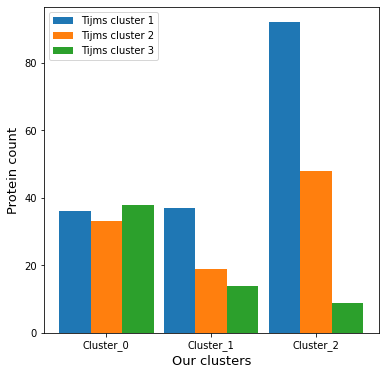

In [68]:
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()

width = 0.3
ind = np.arange(len(count_our_cluster_tijms_cluster))

tijms_custer_1 = [v[1] for v in count_our_cluster_tijms_cluster.values()]
# print(tijms_custer_1)
ax.bar(ind, tijms_custer_1, width=width, label='Tijms cluster 1')


tijms_custer_2 = [v[2] for v in count_our_cluster_tijms_cluster.values()]
# print(tijms_custer_2)
ax.bar(ind + width, tijms_custer_2, width=width, label='Tijms cluster 2')

tijms_custer_3 = [v[3] for v in count_our_cluster_tijms_cluster.values()]
# print(tijms_custer_3)
ax.bar(ind + width*2, tijms_custer_3, width=width, label='Tijms cluster 3')

ax.set_ylabel('Protein count', fontsize=13)
ax.set_xticks(ind + width)
ax.set_xticklabels(['Cluster_0', 'Cluster_1', 'Cluster_2'])
ax.set_xlabel('Our clusters', fontsize=13)

ax.legend(loc='best');

# Saving the plot
plt.savefig(results_dir + '/Rank_3_Comparison_protein_cluster_with_Tijms.png')

### **Cell type**

In [69]:
brain_rna_seq_data = pd.read_excel('Brain_RNA_seq_database.xlsx', sheet_name='human_mod')

# resetting the index
uniprot_code_brain_db = list(brain_rna_seq_data['Uniprot'])
brain_rna_seq_data = brain_rna_seq_data.drop(['Uniprot'], axis=1)
brain_rna_seq_data.index = uniprot_code_brain_db

gene_name_brain_db = list(brain_rna_seq_data['Gene'])

In [70]:
brain_rna_seq_data

Gene  Mean_fetal_astrocytes  Mean_mature_astrocytes  \
NaN     1/2-SBSRNA4               0.100000                0.100000   
P04217         A1BG               0.100000                0.100000   
NaN        A1BG-AS1               0.116667                0.166667   
Q9NQ94         A1CF               0.083333                0.100000   
NaN           A2LD1               0.300000                1.225000   
...             ...                    ...                     ...   
Q6WRX3       ZYG11A               0.100000                0.100000   
Q9C0D3       ZYG11B               4.166667                3.675000   
Q15942          ZYX               7.133333                0.358333   
O43149        ZZEF1               2.533333                2.191667   
Q8IYH5         ZZZ3               6.733333                4.275000   

        Human Neurons  Mean_Oligodendrocytes  Mean_Microglia_Macrophage  \
NaN               0.1                   0.10                   0.100000   
P04217            0.1                   0.10                   0.100000   
NaN               0.5                   0.10                   0.233333   
Q9NQ94            0.1                   0.10                   0.100000   
NaN               0.1                   0.10                   0.266667   
...               ...                    ...                        ...   
Q6WRX3            0.2                   0.10                   0.100000   
Q9C0D3           12.8                   3.58                   1.866667   
Q15942            0.1                   0.20                   0.766667   
O43149            1.5                   1.32                   2.633333   
Q8IYH5            5.8                  11.62                   3.433333   

        Mean_Endothelial  Mean_Whole_cortex  
NaN                 0.10              0.100  
P04217              0.10              0.100  
NaN                 0.15              0.075  
Q9NQ94              0.10              0.000  
NaN                 0.10              0.375  
...                  ...                ...  
Q6WRX3              0.10              0.050  
Q9C0D3              1.40              2.525  
Q15942              1.00              0.225  
O43149              0.95              0.475  
Q8IYH5              2.05              3.875  

[21662 rows x 8 columns]

In [71]:
# absent_genes_1 = []

# for idx, gene in enumerate(gene_code):
#     if gene not in gene_name_brain_db:
#         absent_genes_1.append((gene, uniprot_code[idx]))
# print(absent_genes_1)

In [72]:
gene_cell_type = pd.DataFrame(columns=['Gene Entry', 'Uniprot', 'Astrocytes[mean]', 'Neurons[mean]', 'Oligodendrocytes[mean]', 'Microglia[Mean]', 'Endothelial[mean]',
                                        'Astrocytes[%]', 'Neurons[%]', 'Oligodendrocytes[%]', 'Microglia[%]', 'Endothelial[%]', 'Cell Type'])

absent_genes = []

for idx, uniprot in enumerate(uniprot_code):
    if uniprot not in uniprot_code_brain_db:
        absent_genes.append(uniprot)
        dict_to_append = {k: 'NaN' for k in gene_cell_type.columns}
        dict_to_append['Gene Entry'] = protein_code[idx]
        dict_to_append['Uniprot'] = uniprot
        list_to_append = list(dict_to_append.values())
        gene_cell_type.loc[idx] = list_to_append
    else:
        dict_gene = {'Gene Entry': protein_code[idx]}
        dict_uniprot = {'Uniprot': uniprot}
        dict_mean = {}
        # print(uni, gene_code[idx])
        dict_mean['Astrocytes[mean]'] = round(brain_rna_seq_data.loc[uniprot, 'Mean_mature_astrocytes'], 6)
        dict_mean['Neurons[mean]'] = round(brain_rna_seq_data.loc[uniprot, 'Human Neurons'], 6)
        dict_mean['Oligodendrocytes[mean]'] = round(brain_rna_seq_data.loc[uniprot, 'Mean_Oligodendrocytes'], 6)
        dict_mean['Microglia[mean]'] = round(brain_rna_seq_data.loc[uniprot, 'Mean_Microglia_Macrophage'], 6)
        dict_mean['Endothelial[mean]'] = round(brain_rna_seq_data.loc[uniprot, 'Mean_Endothelial'], 6)        

        dict_perc = {}
        
        tot = 0
        for k, v in dict_mean.items():
            tot += v
        dict_perc['Astrocytes[%]'] = round((dict_mean['Astrocytes[mean]'] * 100) / tot, 6)
        dict_perc['Neurons[%]'] = round((dict_mean['Neurons[mean]'] * 100) / tot, 6)
        dict_perc['Oligodendrocytes[%]'] = round((dict_mean['Oligodendrocytes[mean]'] * 100) / tot, 6)
        dict_perc['Microglia[%]'] = round((dict_mean['Microglia[mean]'] * 100) / tot, 6)
        dict_perc['Endothelial[%]'] = round((dict_mean['Endothelial[mean]'] * 100) / tot, 6) 

        perc_val = list(dict_perc.values())
        perc_cell_type = list(dict_perc.keys())
        max_perc = np.max(perc_val)
        if max_perc > 50:
            cell_type = perc_cell_type[perc_val.index(max_perc)][:-3]
        elif max_perc <= 20:
            cell_type = 'Not detected'
        else:
            cell_type = 'Not specific'
        dict_perc['Cell Type'] = cell_type

        dict_to_append = dict_gene | dict_uniprot | dict_mean | dict_perc

        # Building the dataframe
        list_to_append = list(dict_to_append.values())
        gene_cell_type.loc[idx] = list_to_append

gene_index = list(gene_cell_type['Gene Entry'])
gene_cell_type = gene_cell_type.drop(['Gene Entry'], axis=1)
gene_cell_type.index = gene_index

print('There are', len(absent_genes), 'genes that are not present in the RNAseq-Brain database')
print(absent_genes)

There are 59 genes that are not present in the RNAseq-Brain database
['P0DOX5', 'O43505', 'P14618', 'P01859', 'P01876', 'P01871', 'P07711', 'P01615', 'A0A0C4DH38', 'P01860', 'P01619', 'P80748', 'P0DOX3', 'P06310', 'A0A075B6K4', 'A0A0C4DH68', 'A0A0B4J1V0', 'P0DOY2', 'P0DOX2', 'P01700', 'P01701', 'P06312', 'P0DSN7', 'P01861', 'P0DP09', 'P0DOX8', 'A0A0B4J1Y9', 'P06331', 'A0A075B6I9', 'P01594', 'P49908', 'A0A075B6S2', 'Q8WUJ3', 'P01764', 'P01721', 'Q9P0K9', 'A0A0C4DH72', 'A0A0A0MS15', 'A0A0C4DH31', 'A0A0U1RQE8', 'P0DOX7', 'P01591', 'P01718', 'A0A0B4J1X5', 'P01601', 'A0A075B6K5', 'P01709', 'A0A0A0MT36', 'A0A075B6H7', 'A0A075B6I0', 'Q8NCW5', 'A0A075B6S5', 'Q969H8', 'A0A0B4J1U3', 'P01742', 'O14514', 'P01703', 'A0A075B6J9', 'P01705']


In [73]:
gene_cell_type

Uniprot Astrocytes[mean] Neurons[mean] Oligodendrocytes[mean]  \
ALBU_HUMAN   P02768            0.225           0.2                   0.14   
TRFE_HUMAN   P02787            8.875           8.4                 338.82   
TTHY_HUMAN   P02766              0.1           0.1                    0.1   
PTGDS_HUMAN  P41222           80.525           0.1                  21.52   
FBLN1_HUMAN  P23142         5.933333           0.7                   0.12   
...             ...              ...           ...                    ...   
DSG2_HUMAN   Q14126              0.1           0.1                    0.1   
CO6A2_HUMAN  P12110              0.1           0.1                    0.1   
LV223_HUMAN  P01705              NaN           NaN                    NaN   
MOES_HUMAN   P26038        16.633333           2.7                   8.46   
CSPG4_HUMAN  Q6UVK1              0.1           0.1                   0.38   

            Microglia[Mean] Endothelial[mean] Astrocytes[%] Neurons[%]  \
ALBU_HUMAN              0.1               0.1     29.411765  26.143791   
TRFE_HUMAN         2.933333              1.65      2.460641   2.328945   
TTHY_HUMAN              0.1               0.1          20.0       20.0   
PTGDS_HUMAN             0.6             12.85     69.661318   0.086509   
FBLN1_HUMAN             0.1               1.5     71.029528   8.379889   
...                     ...               ...           ...        ...   
DSG2_HUMAN              0.1               0.1          20.0       20.0   
CO6A2_HUMAN             0.1               0.4          12.5       12.5   
LV223_HUMAN             NaN               NaN           NaN        NaN   
MOES_HUMAN        40.666667             20.75     18.645144   3.026567   
CSPG4_HUMAN             0.1              0.35      9.708738   9.708738   

            Oligodendrocytes[%] Microglia[%] Endothelial[%]         Cell Type  
ALBU_HUMAN            18.300654    13.071895      13.071895      Not specific  
TRFE_HUMAN             93.93966     0.813282       0.457471  Oligodendrocytes  
TTHY_HUMAN                 20.0         20.0           20.0      Not detected  
PTGDS_HUMAN           18.616722     0.519054      11.116398        Astrocytes  
FBLN1_HUMAN            1.436552     1.197127      17.956904        Astrocytes  
...                         ...          ...            ...               ...  
DSG2_HUMAN                 20.0         20.0           20.0      Not detected  
CO6A2_HUMAN                12.5         12.5           50.0      Not specific  
LV223_HUMAN                 NaN          NaN            NaN               NaN  
MOES_HUMAN             9.483242    45.585323      23.259724      Not specific  
CSPG4_HUMAN           36.893204     9.708738      33.980583      Not specific  

[517 rows x 12 columns]

In [74]:
# Saving the table
gene_cell_type.to_excel(results_dir + '/Rank_3_Gene_cell_type.xlsx')

### **Cell type for cluster**

#### All cell type for clusters

In [75]:
gene_cell_type_list = list(gene_cell_type['Cell Type'])

# cell_type_dict = {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0}

cell_type_for_cluster = {'Cluster_0': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}, 
                        'Cluster_1': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}, 
                        'Cluster_2': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}}

for idx, cluster in enumerate(protein_cluster_val_3):
    cluster_n = 'Cluster_'+str(cluster)
    cell_type_for_cluster[cluster_n][gene_cell_type_list[idx]] += 1
    cell_type_for_cluster[cluster_n]['Total'] += 1

print(cell_type_for_cluster)

cell_type_for_cluster_df = pd.DataFrame.from_dict(cell_type_for_cluster)
cell_type_for_cluster_df

# Saving the table
cell_type_for_cluster_df.to_excel(results_dir + '/Rank_3_Cell_type_for_cluster.xlsx')

{'Cluster_0': {'Astrocytes': 16, 'Neurons': 16, 'Oligodendrocytes': 7, 'Microglia': 12, 'Endothelial': 18, 'Not detected': 32, 'Not specific': 66, 'NaN': 25, 'Total': 192}, 'Cluster_1': {'Astrocytes': 7, 'Neurons': 17, 'Oligodendrocytes': 2, 'Microglia': 4, 'Endothelial': 12, 'Not detected': 17, 'Not specific': 44, 'NaN': 24, 'Total': 127}, 'Cluster_2': {'Astrocytes': 30, 'Neurons': 37, 'Oligodendrocytes': 13, 'Microglia': 22, 'Endothelial': 14, 'Not detected': 9, 'Not specific': 63, 'NaN': 10, 'Total': 198}}


In [76]:
# cell_type_for_cluster_df.to_excel('Results_165/Cell_type_for_cluster.xlsx')

**Pie charts**

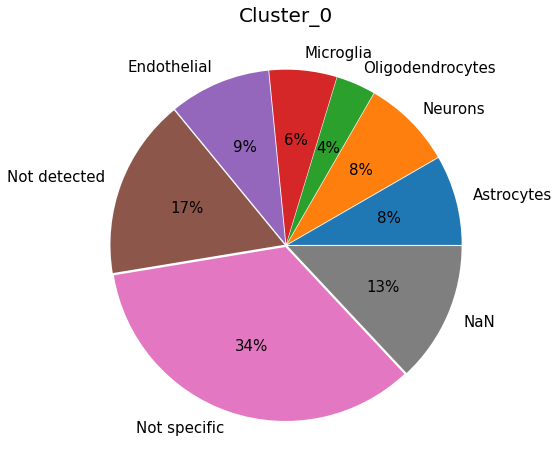

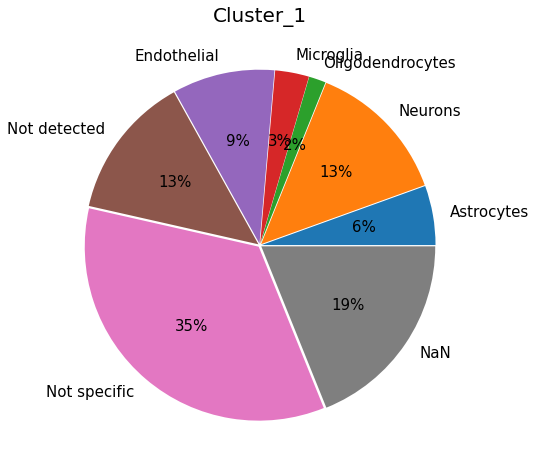

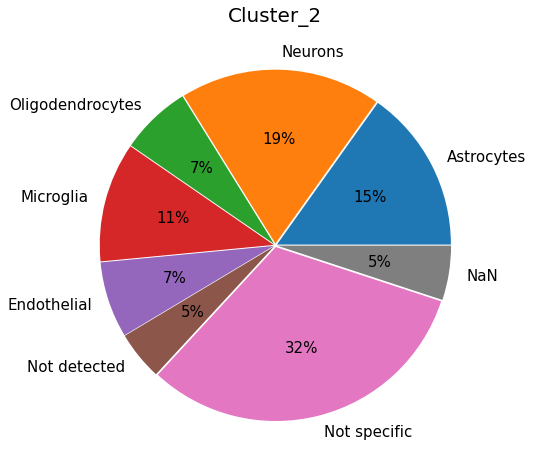

In [77]:
# Plotting with pie charts
cluster_to_plot = 'Cluster_2'

for cluster_to_plot in ['Cluster_0', 'Cluster_1', 'Cluster_2']:

    values = list(cell_type_for_cluster_df[cluster_to_plot])[:-1]

    fig = plt.figure(figsize=(8, 8))
    plt.pie(values, labels=list(cell_type_for_cluster_df.index)[:-1], textprops={'fontsize': 15}, autopct='%1.0f%%', explode=[0.01 for i in range(len(values))])
    plt.title(cluster_to_plot, fontsize=20);
    
    # Saving the plot
    plt.savefig(results_dir + '/Rank_3_Cell_type_' + cluster_to_plot + '.png')

#### Protein lower or greater than control - Cell type

In [78]:
clustered_proteins_matrix_3 = clustered_proteins_df_3.values
clustered_proteins_matrix_means = []

# print(clustered_proteins_matrix_3)

for row in clustered_proteins_matrix_3:
    # print(row[:-2:2])
    clustered_proteins_matrix_means.append(row[:-2:2])

clustered_proteins_matrix_means = np.array(clustered_proteins_matrix_means)
# print(clustered_proteins_matrix_means)

protein_lower_greater_control = []

for idx, uniprot in enumerate(uniprot_code):
    temp_clustered_protein_means = clustered_proteins_matrix_means[idx]
    temp_cluster = protein_cluster_val_3[idx]
    if temp_clustered_protein_means[temp_cluster] > 0:
        protein_lower_greater_control.append(1)
    elif temp_clustered_protein_means[temp_cluster] < 0:
        protein_lower_greater_control.append(-1)

# print(protein_lower_greater_control)
protein_lower_than_control_cell_type = {'Cluster_0': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}, 
                                        'Cluster_1': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}, 
                                        'Cluster_2': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}}

protein_greater_than_control_cell_type = {'Cluster_0': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}, 
                                          'Cluster_1': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}, 
                                          'Cluster_2': {'Astrocytes': 0, 'Neurons': 0, 'Oligodendrocytes': 0, 'Microglia': 0, 'Endothelial': 0, 'Not detected': 0, 'Not specific': 0, 'NaN': 0, 'Total': 0}}


for idx, protein in enumerate(protein_code):
    # print(protein, protein_lower_greater_control[idx], protein_cluster_val_3[idx])
    if protein_lower_greater_control[idx] < 0:
        # print(protein, protein_lower_greater_control[idx], protein_cluster_val_3[idx])
        temp_cell_type = gene_cell_type.loc[protein, 'Cell Type']
        temp_cluster = protein_cluster_val_3[idx]
        # print(temp_cell_type)
        protein_lower_than_control_cell_type['Cluster_' + str(temp_cluster)][temp_cell_type] += 1
        protein_lower_than_control_cell_type['Cluster_' + str(temp_cluster)]['Total'] += 1
    elif protein_lower_greater_control[idx] > 0:
        temp_cell_type = gene_cell_type.loc[protein, 'Cell Type']
        temp_cluster = protein_cluster_val_3[idx]
        protein_greater_than_control_cell_type['Cluster_' + str(temp_cluster)][temp_cell_type] += 1
        protein_greater_than_control_cell_type['Cluster_' + str(temp_cluster)]['Total'] += 1

cell_type_protein_lower_control_df = pd.DataFrame(protein_lower_than_control_cell_type)
cell_type_protein_greater_control_df = pd.DataFrame(protein_greater_than_control_cell_type)

# Save the table
cell_type_protein_lower_control_df.to_excel(results_dir + '/Rank_3_Cell_type_lower_than_control.xlsx')
cell_type_protein_greater_control_df.to_excel(results_dir + '/Rank_3_Cell_type_greater_than_control.xlsx')

In [79]:
print('For a total of', protein_lower_greater_control.count(-1), 'proteins that are lower than the control')
cell_type_protein_lower_control_df

For a total of 157 proteins that are lower than the control


Cluster_0  Cluster_1  Cluster_2
Astrocytes                7          0          2
Neurons                   6         11          6
Oligodendrocytes          2          1          1
Microglia                 4          1          2
Endothelial               8          5          2
Not detected              8         12          7
Not specific             20         16         14
NaN                       4         15          3
Total                    59         61         37

In [80]:
print('For a total of', protein_lower_greater_control.count(1), 'proteins that are greater than the control')
cell_type_protein_greater_control_df

For a total of 360 proteins that are greater than the control


Cluster_0  Cluster_1  Cluster_2
Astrocytes                9          7         28
Neurons                  10          6         31
Oligodendrocytes          5          1         12
Microglia                 8          3         20
Endothelial              10          7         12
Not detected             24          5          2
Not specific             46         28         49
NaN                      21          9          7
Total                   133         66        161

In [81]:
# cell_type_protein_lower_control_df.to_excel('Cell_type_protein_lower_control.xlsx')
# cell_type_protein_greater_control_df.to_excel('Cell_type_protein_greater_control.xlsx')

## **Rank = 4**

In [82]:
# Building the model with rank = 4
nsnmf_4 = nimfa.Nsnmf(V, rank=4, n_run=n_run, max_iter=max_iter, track_factor=True)
nsnmf_4_fit = nsnmf_4()

In [83]:
# Computing the cophenetic correlation coefficient
cophonetic_cor_coef_4 = nsnmf_4_fit.fit.coph_cor()
print('Cophenetic correlation coefficient:', cophonetic_cor_coef_4)

cophonetic_results['Rank_4'] = cophonetic_cor_coef_4

Cophenetic correlation coefficient: 0.8664674537150301


### **Consensus matrix**

<ipython-input-84-6b651b67d0cb>:12: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



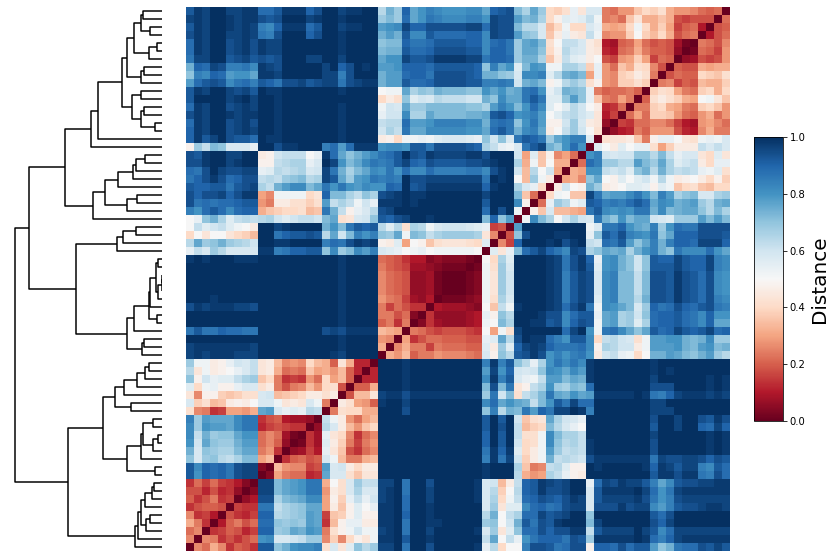

In [84]:
# plotting the Consensus matrix as an heatmap
def clean_axis(ax):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

fig = plt.figure(figsize=(13.9, 10))
heatmapGS = gridspec.GridSpec(1, 2, wspace=.01, hspace=0., width_ratios=[0.25, 1])

C_4 = 1 - nsnmf_4_fit.fit.consensus()
Y = sch.linkage(C_4, method='average') 

denAX = fig.add_subplot(heatmapGS[0, 0])
denD = sch.dendrogram(Y, orientation='left', link_color_func=lambda k: 'black')
clean_axis(denAX)

heatmapAX = fig.add_subplot(heatmapGS[0, 1])
D = C_4[denD['leaves'], :][:, denD['leaves']]
axi = heatmapAX.imshow(D, interpolation='nearest', aspect='equal', origin='lower', cmap='RdBu')
clean_axis(heatmapAX)

cb = fig.colorbar(axi, fraction=0.046, pad=0.04, aspect=10)
cb.set_label('Distance', fontsize=20)

# Saving the plot
plt.savefig(results_dir + '/Rank_4_Consensus_matrix.png')

### **W matrix**

In [85]:
# Computing the W basis matrix
W_4 = nsnmf_4_fit.fit.basis()

print(f'The shape of the W matrix is: {W_4.shape[0]} rows (proteins) x {W_4.shape[1]} columns (metaproteins)')

The shape of the W matrix is: 517 rows (proteins) x 4 columns (metaproteins)


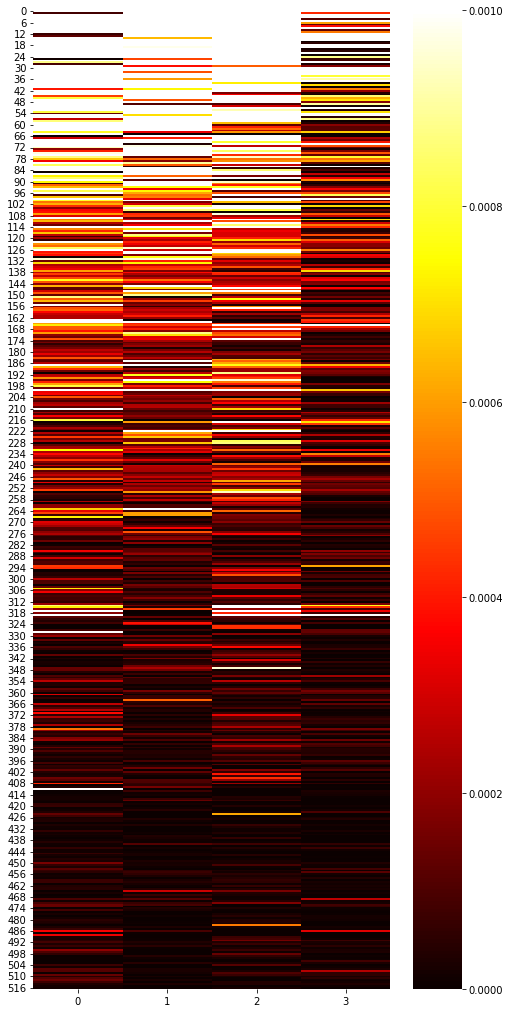

In [86]:
fig, ax = plt.subplots(figsize=(8, 18))

# Plotting the heatmap of the W matrix
sns.heatmap(W_4[: , : ], cmap='hot', vmax=0.001) #Try without setting vmax

# Saving the plot
plt.savefig(results_dir + '/Rank_4_W_matrix.png')

#### Visualizing for each cluster (metaprotein) the coefficient of the proteins

In [87]:
prot_clusters_dict_4 = k_proteins_of_metaprotein(W_4, 4)

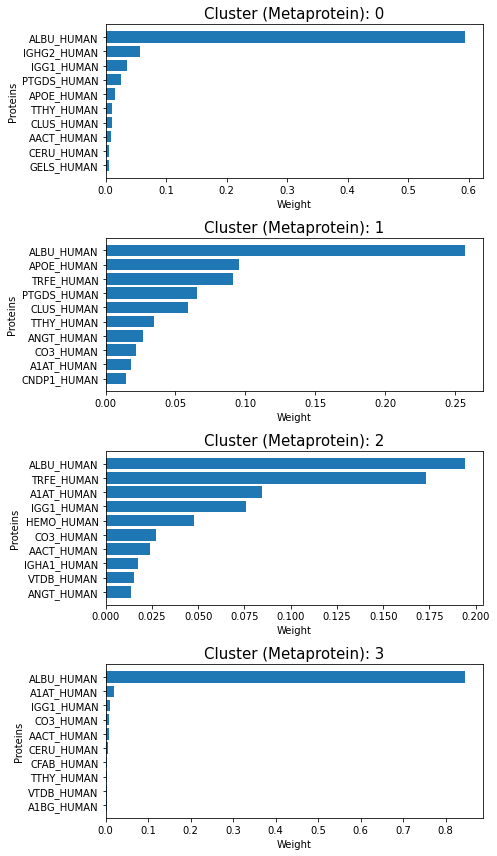

In [88]:
plotting_metaproteins(prot_clusters_dict_4)

### **H matrix**

In [89]:
# Computing the H coef matrix
H_4 = np.array(nsnmf_4_fit.fit.coef())

print(f'The shape of the H matrix is: {H_4.shape[0]} rows (metaprotein) x {H_4.shape[1]} columns (patients)')

The shape of the H matrix is: 4 rows (metaprotein) x 68 columns (patients)


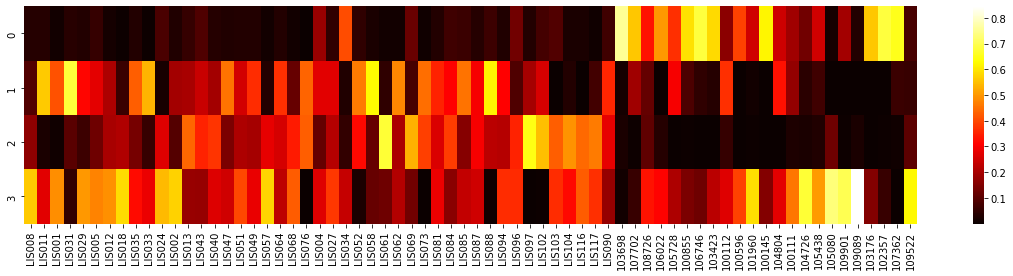

In [90]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.heatmap(H_4[: , : ], cmap='hot', xticklabels=patient_code) 

# Saving the plot
plt.savefig(results_dir + '/Rank_4_H_matrix.png')

In [91]:
patient_clusters_4 = cluster_assign_patients(H_4)

In [92]:
clustered_patient_4 = grouping_patients_for_cluster(patient_clusters_4)

Cluster(Metaprotein)_0: ['LIS034', '103698', '107702', '108726', '106022', '105728', '100855', '106746', '103423', '100145', '103176', '102357', '107362'] - N° of patients: 13 

Cluster(Metaprotein)_1: ['LIS011', 'LIS031', 'LIS035', 'LIS033', 'LIS047', 'LIS049', 'LIS064', 'LIS076', 'LIS004', 'LIS052', 'LIS058', 'LIS062', 'LIS073', 'LIS081', 'LIS085', 'LIS087', 'LIS088', 'LIS090', '100112', '104804'] - N° of patients: 20 

Cluster(Metaprotein)_2: ['LIS013', 'LIS043', 'LIS040', 'LIS061', 'LIS069', 'LIS084', 'LIS097', 'LIS102', 'LIS103', 'LIS104', 'LIS116', 'LIS117'] - N° of patients: 12 

Cluster(Metaprotein)_3: ['LIS008', 'LIS001', 'LIS029', 'LIS005', 'LIS012', 'LIS018', 'LIS024', 'LIS002', 'LIS051', 'LIS057', 'LIS068', 'LIS027', 'LIS094', 'LIS096', '100596', '101960', '100111', '104726', '105438', '105080', '109901', '109089', '109522'] - N° of patients: 23 



In [93]:
# Saving the clustered patients
f = open(results_dir + '/Rank_4_Clustered_patients.txt', 'w')

for cluster, patient in clustered_patient_4.items():
    lis_tot = 0 
    coi_tot = 0
    for pat in patient:
        if pat[0] == 'L':
            lis_tot += 1
        else:
            coi_tot += 1
    f.write(f'Cluster(Metaprotein)_{cluster}: \n{patient} \nNumber of patients: {len(patient)} \n- {lis_tot} Lisbon patients \n- {coi_tot} Coimbra patients\n')
    f.write('\n')

f.close()

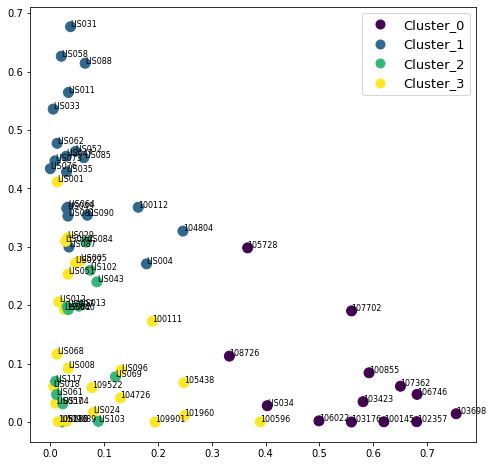

In [94]:
plotting_clusters(H_4, patient_clusters_4)

### **Computing the Silhouette Score**

In [95]:
silhouette_score_4 = silhouette_score(C_4, list(patient_clusters_4.values()))
print(silhouette_score_4)

silhouette_results['Rank_4'] = silhouette_score_4

0.4503640084180623


Silhouette average score: 0.4503640081802382


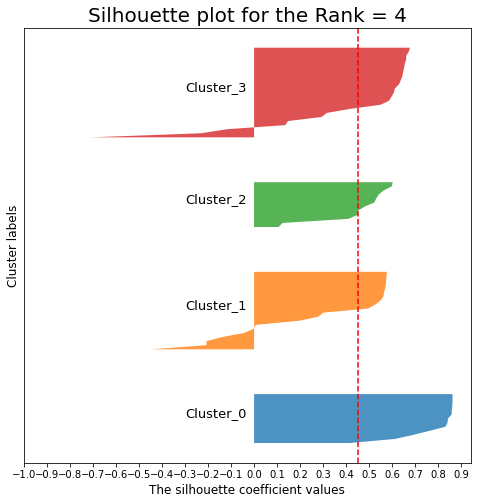

In [96]:
silhouette_plot(C_4, patient_clusters_4)

### **Explained Variance**

In [97]:
# Explained Variance best fit
var_4 = nsnmf_4_fit.fit.evar()
print('Variance best model:', var_4)
ex_var_best_fit['Rank_4'] = var_4

# Explained Variance Random model
nsnmf_4_random = nimfa.Nsnmf(V, rank=4, n_run=1, max_iter=1)
nsnmf_4_random_fit = nsnmf_4_random()
var_4_random = nsnmf_4_random_fit.fit.evar()
print('Varince random model:', var_4_random)
ex_var_random['Rank_4'] = var_4_random

Variance best model: 0.9977754378561672
Varince random model: 0.0122203264667472


## **Rank = 5**

In [98]:
# Building the model with rank = 4
nsnmf_5 = nimfa.Nsnmf(V, rank=5, n_run=n_run, max_iter=max_iter, track_factor=True)
nsnmf_5_fit = nsnmf_5()

In [99]:
# Computing the cophenetic correlation coefficient
cophonetic_cor_coef_5 = nsnmf_5_fit.fit.coph_cor()
print('Cophenetic correlation coefficient:', cophonetic_cor_coef_5)

cophonetic_results['Rank_5'] = cophonetic_cor_coef_5

Cophenetic correlation coefficient: 0.8840323822703735


### **Consensus matrix**

<ipython-input-100-652e2c07e42e>:12: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



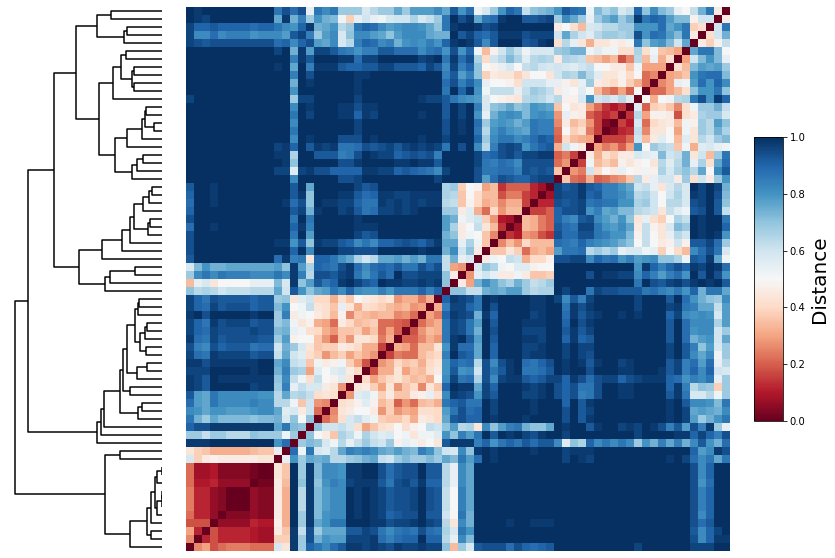

In [100]:
# plotting the Consensus matrix as an heatmap
def clean_axis(ax):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)

fig = plt.figure(figsize=(13.9, 10))
heatmapGS = gridspec.GridSpec(1, 2, wspace=.01, hspace=0., width_ratios=[0.25, 1])

C_5 = 1 - nsnmf_5_fit.fit.consensus()
Y = sch.linkage(C_5, method='average') 

denAX = fig.add_subplot(heatmapGS[0, 0])
denD = sch.dendrogram(Y, orientation='left', link_color_func=lambda k: 'black')
clean_axis(denAX)

heatmapAX = fig.add_subplot(heatmapGS[0, 1])
D = C_5[denD['leaves'], :][:, denD['leaves']]
axi = heatmapAX.imshow(D, interpolation='nearest', aspect='equal', origin='lower', cmap='RdBu')
clean_axis(heatmapAX)

cb = fig.colorbar(axi, fraction=0.046, pad=0.04, aspect=10)
cb.set_label('Distance', fontsize=20)

# Saving the plot
plt.savefig(results_dir + '/Rank_5_Consensus_matrix.png')

### **W matrix**

In [101]:
# Computing the W basis matrix
W_5 = nsnmf_5_fit.fit.basis()

print(f'The shape of the W matrix is: {W_5.shape[0]} rows (proteins) x {W_5.shape[1]} columns (metaproteins)')

The shape of the W matrix is: 517 rows (proteins) x 5 columns (metaproteins)


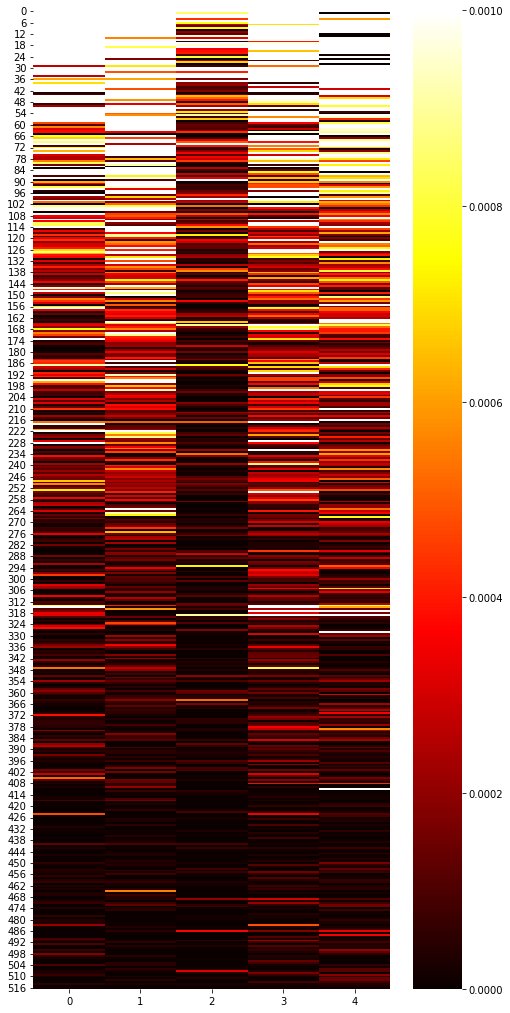

In [102]:
fig, ax = plt.subplots(figsize=(8, 18))

# Plotting the heatmap of the W matrix
sns.heatmap(W_5[: , : ], cmap='hot', vmax=0.001) #Try without setting vmax

# Saving the plot
plt.savefig(results_dir + '/Rank_5_W_matrix.png')

#### Visualizing for each cluster (metaprotein) the coefficient of the proteins

In [103]:
prot_clusters_dict_5 = k_proteins_of_metaprotein(W_5, 5)

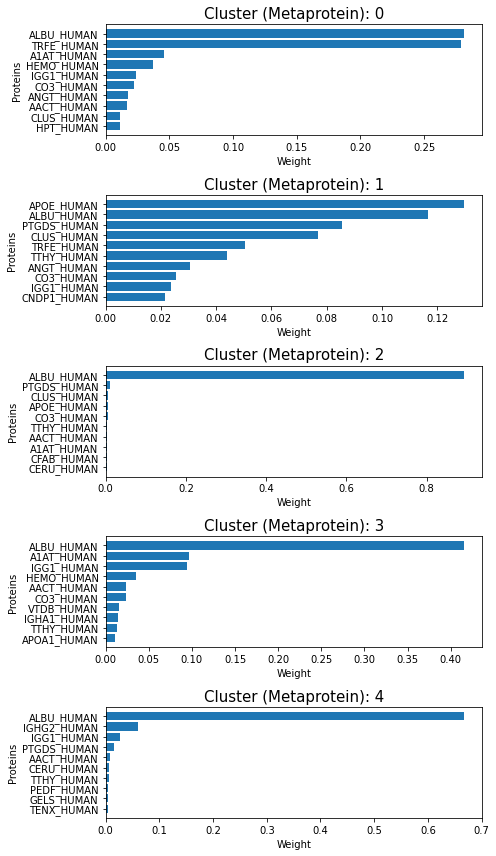

In [104]:
plotting_metaproteins(prot_clusters_dict_5)

### **H matrix**

In [105]:
# Computing the H coef matrix
H_5 = np.array(nsnmf_5_fit.fit.coef())

print(f'The shape of the H matrix is: {H_5.shape[0]} rows (metaprotein) x {H_5.shape[1]} columns (patients)')

The shape of the H matrix is: 5 rows (metaprotein) x 68 columns (patients)


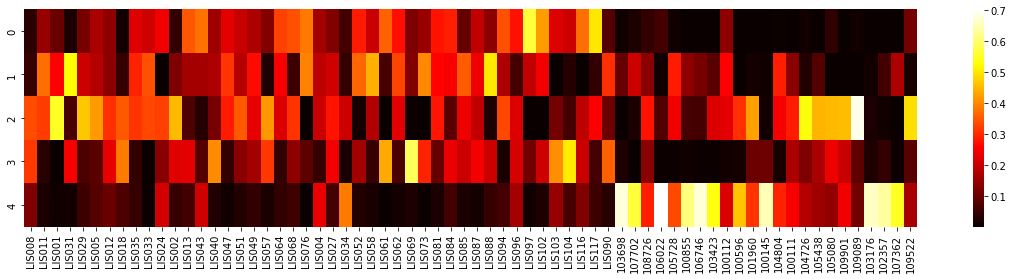

In [106]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.heatmap(H_5[: , : ], cmap='hot', xticklabels=patient_code) 

# Saving the plot
plt.savefig(results_dir + '/Rank_5_H_matrix.png')

In [107]:
patient_clusters_5 = cluster_assign_patients(H_5)

In [108]:
clustered_patient_5 = grouping_patients_for_cluster(patient_clusters_5)

Cluster(Metaprotein)_0: ['LIS013', 'LIS043', 'LIS064', 'LIS068', 'LIS084', 'LIS094', 'LIS096', 'LIS097', 'LIS102', 'LIS116', 'LIS117'] - N° of patients: 11 

Cluster(Metaprotein)_1: ['LIS011', 'LIS031', 'LIS033', 'LIS047', 'LIS049', 'LIS076', 'LIS052', 'LIS058', 'LIS062', 'LIS073', 'LIS085', 'LIS088', '100112'] - N° of patients: 13 

Cluster(Metaprotein)_2: ['LIS008', 'LIS001', 'LIS029', 'LIS005', 'LIS012', 'LIS035', 'LIS024', 'LIS002', 'LIS051', 'LIS057', 'LIS027', 'LIS081', '101960', '100111', '104726', '105438', '105080', '109901', '109089', '109522'] - N° of patients: 20 

Cluster(Metaprotein)_3: ['LIS018', 'LIS040', 'LIS061', 'LIS069', 'LIS087', 'LIS103', 'LIS104', 'LIS090'] - N° of patients: 8 

Cluster(Metaprotein)_4: ['LIS004', 'LIS034', '103698', '107702', '108726', '106022', '105728', '100855', '106746', '103423', '100596', '100145', '104804', '103176', '102357', '107362'] - N° of patients: 16 



In [109]:
# Saving the clustered patients
f = open(results_dir + '/Rank_5_Clustered_patients.txt', 'w')

for cluster, patient in clustered_patient_5.items():
    lis_tot = 0 
    coi_tot = 0
    for pat in patient:
        if pat[0] == 'L':
            lis_tot += 1
        else:
            coi_tot += 1
    f.write(f'Cluster(Metaprotein)_{cluster}: \n{patient} \nNumber of patients: {len(patient)} \n- {lis_tot} Lisbon patients \n- {coi_tot} Coimbra patients\n')
    f.write('\n')

f.close()

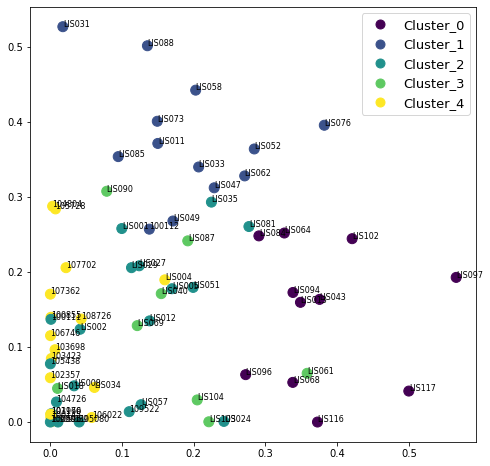

In [110]:
plotting_clusters(H_5, patient_clusters_5)

### **Computing the Silhouette Score**

In [111]:
silhouette_score_5 = silhouette_score(C_5, list(patient_clusters_5.values()))
print(silhouette_score_5)

silhouette_results['Rank_5'] = silhouette_score_5

0.37687751776844297


Silhouette average score: 0.37687751776843903


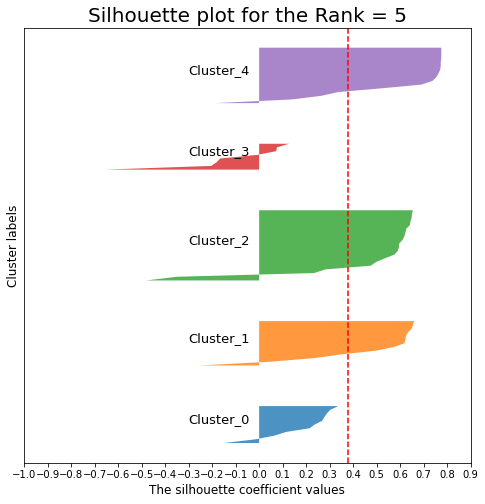

In [112]:
silhouette_plot(C_5, patient_clusters_5)

### **Explained Variance**

In [113]:
# Explained Variance best fit
var_5 = nsnmf_5_fit.fit.evar()
print('Variance best model:', var_5)
ex_var_best_fit['Rank_5'] = var_5


# Explained Variance Random model
nsnmf_5_random = nimfa.Nsnmf(V, rank=5, n_run=1, max_iter=1)
nsnmf_5_random_fit = nsnmf_5_random()
var_5_random = nsnmf_5_random_fit.fit.evar()
print('Varince random model:', var_5_random)
ex_var_random['Rank_5'] = var_5_random

Variance best model: 0.9985354147592815
Varince random model: 0.012662576421570981


## **Final results and Improved fit**

In [114]:
# Saving the results to a txt file
file = open(results_dir + '/0_Final_results_' + day + '.txt', 'w')

i = 0

file.write(f'- Proteins: {len(protein_code)} - Patients: {len(patient_code)}\n')
file.write(f'- N_runs: {n_run} - Max_iter: {max_iter}\n')
file.write('\n')

for rank, val in ex_var_best_fit.items():
    print('-----', rank, '------') 
    file.write(f'-----------{rank}------------ \n')
    random_val = ex_var_random[rank]
    # Printing cophonetic and silhouette score
    print(f'- Cophonetic correlation coefficient: {cophonetic_results[rank]}')
    file.write(f'- Cophonetic correlation coefficient: {cophonetic_results[rank]}\n')
    print(f'- Silhouette score: {silhouette_results[rank]}')    
    file.write(f'- Silhouette score: {silhouette_results[rank]}\n') 
    if i != 0:
        prec_val = prec_val * 100   
        actual_val = val * 100
        increase = actual_val - prec_val
        increase_perc = ((increase / prec_val) * 100) * 100
        print(f'Best_fit_increase: {increase_perc}\n')
        file.write(f'Best_fit_increase: {increase_perc}\n')
        print(f'- Improved fit: {increase_perc / (random_val*100)}\n')
        file.write(f'- Improved fit: {increase_perc / (random_val*100)}\n')
    else:
        print('Best_fit_increase: NA')
        file.write('Best_fit_increase: NA \n')
        print('- Improved fit: NA')
        file.write('- Improved fit: NA \n')
    file.write('\n')
    prec_val = val
    i += 1
   
file.close()

----- Rank_2 ------
- Cophonetic correlation coefficient: 0.9907687225726581
- Silhouette score: 0.9505455199112629
Best_fit_increase: NA
- Improved fit: NA
----- Rank_3 ------
- Cophonetic correlation coefficient: 0.9428246906106419
- Silhouette score: 0.3638562401017472
Best_fit_increase: 0.8970034298116946

- Improved fit: 0.8011184053653666

----- Rank_4 ------
- Cophonetic correlation coefficient: 0.8664674537150301
- Silhouette score: 0.4503640084180623
Best_fit_increase: 28.30404485362746

- Improved fit: 23.161447389024964

----- Rank_5 ------
- Cophonetic correlation coefficient: 0.8840323822703735
- Silhouette score: 0.37687751776844297
Best_fit_increase: 7.6167128822822905

- Improved fit: 6.015136753138998



## **Saving the environment**

In [115]:
dill.dump_session(results_dir + '/1_Protein_517_Clustering_py_final_env_' + day + '.db')

In [116]:
os.remove('Protein_517_Clustering_py_final_env.db')

In [117]:
dill.dump_session('Protein_517_Clustering_py_final_env.db')